In [1]:
import ants
import nilearn
from nilearn import image
import os
import shutil
import nibabel as nib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from nilearn.image import load_img
from nilearn.image import math_img
from nilearn.image import resample_to_img
from nipype.interfaces.ants import ApplyTransforms
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# Native to MNI to Native Conversion

In [4]:
#main conversion here
def conversion(input_image, reference_image, transform, output_image, interpolation='NearestNeighbor'):
    at = ApplyTransforms()
    at.inputs.dimension = 3
    at.inputs.input_image = input_image
    at.inputs.reference_image = reference_image
    at.inputs.transforms = transform
    at.inputs.output_image = output_image
    at.inputs.invert_transform_flags = [False]
    at.inputs.interpolation = interpolation
    at.run()

#get the reference image for function above
def get_reference_image(base_path, possible_files):
    for file_suffix in possible_files:
        ref_image_path = f'{base_path}{file_suffix}'
        if os.path.exists(ref_image_path):
            return ref_image_path
    return None

#run the conversions
def iterative_conversion(subject_id, hemisphere, iterations=150): #enter amount of iterations here
    base_input_path = f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/FieldTrip/{i}/resampled/{i}_native_sim-binary_model-simbio_{hemisphere}.nii'
    base_path = f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Data/derivatives/leaddbs/{i}/coregistration/anat/{i}_ses-preop_space-anchorNative_desc-preproc_acq-'
    possible_files = ['ax_T1w.nii', 'cor_T1w.nii', 'iso_T1w.nii', 'ax_T2w.nii', 'iso_T2w.nii', 'sag_T1w.nii']
    reference_image = get_reference_image(base_path, possible_files)
    
    if reference_image is None:
        print(f'Reference image not found for subject {i}')
        return

    native2mni_transform = f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Data/derivatives/leaddbs/{i}/normalization/transformations/{i}_from-anchorNative_to-MNI152NLin2009bAsym_desc-ants.nii.gz'
    mni2native_transform = f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Data/derivatives/leaddbs/{i}/normalization/transformations/{i}_from-MNI152NLin2009bAsym_to-anchorNative_desc-ants.nii.gz'
    output_dir = f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Degradation/{i}/'
    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    input_image = base_input_path
    
    for j in range(1, iterations + 1):
        print(f'Subject: {i}, Iteration: {j}/{iterations}')
        
        mni_output = f'{output_dir}/{i}_Iteration{j}_MNI_output_{hemisphere}.nii.gz'
        native_output = f'{output_dir}/{i}_Iteration{j}_Native_output_{hemisphere}.nii.gz'
        
        #native to MNI
        conversion(input_image, reference_image, native2mni_transform, mni_output)
        
        #MNI back to native
        conversion(mni_output, reference_image, mni2native_transform, native_output)
        
        #update input_image for next iteration
        input_image = native_output

directory = [i for i in os.listdir('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/FieldTrip') if i.startswith('sub-BER01') or i.startswith('sub-BER02') or i.startswith('sub-BER03') or i.startswith('sub-BER04') or i.startswith('sub-BER05')]
hemispheres = ['hemi-L', 'hemi-R']

for i in directory:
    for hemisphere in hemispheres:
        iterative_conversion(i, hemisphere)

Subject: sub-BER010, Iteration: 1/150
Subject: sub-BER010, Iteration: 2/150
Subject: sub-BER010, Iteration: 3/150
Subject: sub-BER010, Iteration: 4/150
Subject: sub-BER010, Iteration: 5/150
Subject: sub-BER010, Iteration: 6/150
Subject: sub-BER010, Iteration: 7/150
Subject: sub-BER010, Iteration: 8/150
Subject: sub-BER010, Iteration: 9/150
Subject: sub-BER010, Iteration: 10/150
Subject: sub-BER010, Iteration: 11/150
Subject: sub-BER010, Iteration: 12/150
Subject: sub-BER010, Iteration: 13/150
Subject: sub-BER010, Iteration: 14/150
Subject: sub-BER010, Iteration: 15/150
Subject: sub-BER010, Iteration: 16/150
Subject: sub-BER010, Iteration: 17/150
Subject: sub-BER010, Iteration: 18/150
Subject: sub-BER010, Iteration: 19/150
Subject: sub-BER010, Iteration: 20/150
Subject: sub-BER010, Iteration: 21/150
Subject: sub-BER010, Iteration: 22/150
Subject: sub-BER010, Iteration: 23/150
Subject: sub-BER010, Iteration: 24/150
Subject: sub-BER010, Iteration: 25/150
Subject: sub-BER010, Iteration: 26

Subject: sub-BER010, Iteration: 61/150
Subject: sub-BER010, Iteration: 62/150
Subject: sub-BER010, Iteration: 63/150
Subject: sub-BER010, Iteration: 64/150
Subject: sub-BER010, Iteration: 65/150
Subject: sub-BER010, Iteration: 66/150
Subject: sub-BER010, Iteration: 67/150
Subject: sub-BER010, Iteration: 68/150
Subject: sub-BER010, Iteration: 69/150
Subject: sub-BER010, Iteration: 70/150
Subject: sub-BER010, Iteration: 71/150
Subject: sub-BER010, Iteration: 72/150
Subject: sub-BER010, Iteration: 73/150
Subject: sub-BER010, Iteration: 74/150
Subject: sub-BER010, Iteration: 75/150
Subject: sub-BER010, Iteration: 76/150
Subject: sub-BER010, Iteration: 77/150
Subject: sub-BER010, Iteration: 78/150
Subject: sub-BER010, Iteration: 79/150
Subject: sub-BER010, Iteration: 80/150
Subject: sub-BER010, Iteration: 81/150
Subject: sub-BER010, Iteration: 82/150
Subject: sub-BER010, Iteration: 83/150
Subject: sub-BER010, Iteration: 84/150
Subject: sub-BER010, Iteration: 85/150
Subject: sub-BER010, Iter

Subject: sub-BER011, Iteration: 120/150
Subject: sub-BER011, Iteration: 121/150
Subject: sub-BER011, Iteration: 122/150
Subject: sub-BER011, Iteration: 123/150
Subject: sub-BER011, Iteration: 124/150
Subject: sub-BER011, Iteration: 125/150
Subject: sub-BER011, Iteration: 126/150
Subject: sub-BER011, Iteration: 127/150
Subject: sub-BER011, Iteration: 128/150
Subject: sub-BER011, Iteration: 129/150
Subject: sub-BER011, Iteration: 130/150
Subject: sub-BER011, Iteration: 131/150
Subject: sub-BER011, Iteration: 132/150
Subject: sub-BER011, Iteration: 133/150
Subject: sub-BER011, Iteration: 134/150
Subject: sub-BER011, Iteration: 135/150
Subject: sub-BER011, Iteration: 136/150
Subject: sub-BER011, Iteration: 137/150
Subject: sub-BER011, Iteration: 138/150
Subject: sub-BER011, Iteration: 139/150
Subject: sub-BER011, Iteration: 140/150
Subject: sub-BER011, Iteration: 141/150
Subject: sub-BER011, Iteration: 142/150
Subject: sub-BER011, Iteration: 143/150
Subject: sub-BER011, Iteration: 144/150


Subject: sub-BER012, Iteration: 29/150
Subject: sub-BER012, Iteration: 30/150
Subject: sub-BER012, Iteration: 31/150
Subject: sub-BER012, Iteration: 32/150
Subject: sub-BER012, Iteration: 33/150
Subject: sub-BER012, Iteration: 34/150
Subject: sub-BER012, Iteration: 35/150
Subject: sub-BER012, Iteration: 36/150
Subject: sub-BER012, Iteration: 37/150
Subject: sub-BER012, Iteration: 38/150
Subject: sub-BER012, Iteration: 39/150
Subject: sub-BER012, Iteration: 40/150
Subject: sub-BER012, Iteration: 41/150
Subject: sub-BER012, Iteration: 42/150
Subject: sub-BER012, Iteration: 43/150
Subject: sub-BER012, Iteration: 44/150
Subject: sub-BER012, Iteration: 45/150
Subject: sub-BER012, Iteration: 46/150
Subject: sub-BER012, Iteration: 47/150
Subject: sub-BER012, Iteration: 48/150
Subject: sub-BER012, Iteration: 49/150
Subject: sub-BER012, Iteration: 50/150
Subject: sub-BER012, Iteration: 51/150
Subject: sub-BER012, Iteration: 52/150
Subject: sub-BER012, Iteration: 53/150
Subject: sub-BER012, Iter

Subject: sub-BER012, Iteration: 88/150
Subject: sub-BER012, Iteration: 89/150
Subject: sub-BER012, Iteration: 90/150
Subject: sub-BER012, Iteration: 91/150
Subject: sub-BER012, Iteration: 92/150
Subject: sub-BER012, Iteration: 93/150
Subject: sub-BER012, Iteration: 94/150
Subject: sub-BER012, Iteration: 95/150
Subject: sub-BER012, Iteration: 96/150
Subject: sub-BER012, Iteration: 97/150
Subject: sub-BER012, Iteration: 98/150
Subject: sub-BER012, Iteration: 99/150
Subject: sub-BER012, Iteration: 100/150
Subject: sub-BER012, Iteration: 101/150
Subject: sub-BER012, Iteration: 102/150
Subject: sub-BER012, Iteration: 103/150
Subject: sub-BER012, Iteration: 104/150
Subject: sub-BER012, Iteration: 105/150
Subject: sub-BER012, Iteration: 106/150
Subject: sub-BER012, Iteration: 107/150
Subject: sub-BER012, Iteration: 108/150
Subject: sub-BER012, Iteration: 109/150
Subject: sub-BER012, Iteration: 110/150
Subject: sub-BER012, Iteration: 111/150
Subject: sub-BER012, Iteration: 112/150
Subject: sub

Subject: sub-BER013, Iteration: 146/150
Subject: sub-BER013, Iteration: 147/150
Subject: sub-BER013, Iteration: 148/150
Subject: sub-BER013, Iteration: 149/150
Subject: sub-BER013, Iteration: 150/150
Subject: sub-BER013, Iteration: 1/150
Subject: sub-BER013, Iteration: 2/150
Subject: sub-BER013, Iteration: 3/150
Subject: sub-BER013, Iteration: 4/150
Subject: sub-BER013, Iteration: 5/150
Subject: sub-BER013, Iteration: 6/150
Subject: sub-BER013, Iteration: 7/150
Subject: sub-BER013, Iteration: 8/150
Subject: sub-BER013, Iteration: 9/150
Subject: sub-BER013, Iteration: 10/150
Subject: sub-BER013, Iteration: 11/150
Subject: sub-BER013, Iteration: 12/150
Subject: sub-BER013, Iteration: 13/150
Subject: sub-BER013, Iteration: 14/150
Subject: sub-BER013, Iteration: 15/150
Subject: sub-BER013, Iteration: 16/150
Subject: sub-BER013, Iteration: 17/150
Subject: sub-BER013, Iteration: 18/150
Subject: sub-BER013, Iteration: 19/150
Subject: sub-BER013, Iteration: 20/150
Subject: sub-BER013, Iteratio

Subject: sub-BER014, Iteration: 56/150
Subject: sub-BER014, Iteration: 57/150
Subject: sub-BER014, Iteration: 58/150
Subject: sub-BER014, Iteration: 59/150
Subject: sub-BER014, Iteration: 60/150
Subject: sub-BER014, Iteration: 61/150
Subject: sub-BER014, Iteration: 62/150
Subject: sub-BER014, Iteration: 63/150
Subject: sub-BER014, Iteration: 64/150
Subject: sub-BER014, Iteration: 65/150
Subject: sub-BER014, Iteration: 66/150
Subject: sub-BER014, Iteration: 67/150
Subject: sub-BER014, Iteration: 68/150
Subject: sub-BER014, Iteration: 69/150
Subject: sub-BER014, Iteration: 70/150
Subject: sub-BER014, Iteration: 71/150
Subject: sub-BER014, Iteration: 72/150
Subject: sub-BER014, Iteration: 73/150
Subject: sub-BER014, Iteration: 74/150
Subject: sub-BER014, Iteration: 75/150
Subject: sub-BER014, Iteration: 76/150
Subject: sub-BER014, Iteration: 77/150
Subject: sub-BER014, Iteration: 78/150
Subject: sub-BER014, Iteration: 79/150
Subject: sub-BER014, Iteration: 80/150
Subject: sub-BER014, Iter

Subject: sub-BER014, Iteration: 115/150
Subject: sub-BER014, Iteration: 116/150
Subject: sub-BER014, Iteration: 117/150
Subject: sub-BER014, Iteration: 118/150
Subject: sub-BER014, Iteration: 119/150
Subject: sub-BER014, Iteration: 120/150
Subject: sub-BER014, Iteration: 121/150
Subject: sub-BER014, Iteration: 122/150
Subject: sub-BER014, Iteration: 123/150
Subject: sub-BER014, Iteration: 124/150
Subject: sub-BER014, Iteration: 125/150
Subject: sub-BER014, Iteration: 126/150
Subject: sub-BER014, Iteration: 127/150
Subject: sub-BER014, Iteration: 128/150
Subject: sub-BER014, Iteration: 129/150
Subject: sub-BER014, Iteration: 130/150
Subject: sub-BER014, Iteration: 131/150
Subject: sub-BER014, Iteration: 132/150
Subject: sub-BER014, Iteration: 133/150
Subject: sub-BER014, Iteration: 134/150
Subject: sub-BER014, Iteration: 135/150
Subject: sub-BER014, Iteration: 136/150
Subject: sub-BER014, Iteration: 137/150
Subject: sub-BER014, Iteration: 138/150
Subject: sub-BER014, Iteration: 139/150


Subject: sub-BER015, Iteration: 24/150
Subject: sub-BER015, Iteration: 25/150
Subject: sub-BER015, Iteration: 26/150
Subject: sub-BER015, Iteration: 27/150
Subject: sub-BER015, Iteration: 28/150
Subject: sub-BER015, Iteration: 29/150
Subject: sub-BER015, Iteration: 30/150
Subject: sub-BER015, Iteration: 31/150
Subject: sub-BER015, Iteration: 32/150
Subject: sub-BER015, Iteration: 33/150
Subject: sub-BER015, Iteration: 34/150
Subject: sub-BER015, Iteration: 35/150
Subject: sub-BER015, Iteration: 36/150
Subject: sub-BER015, Iteration: 37/150
Subject: sub-BER015, Iteration: 38/150
Subject: sub-BER015, Iteration: 39/150
Subject: sub-BER015, Iteration: 40/150
Subject: sub-BER015, Iteration: 41/150
Subject: sub-BER015, Iteration: 42/150
Subject: sub-BER015, Iteration: 43/150
Subject: sub-BER015, Iteration: 44/150
Subject: sub-BER015, Iteration: 45/150
Subject: sub-BER015, Iteration: 46/150
Subject: sub-BER015, Iteration: 47/150
Subject: sub-BER015, Iteration: 48/150
Subject: sub-BER015, Iter

Subject: sub-BER016, Iteration: 83/150
Subject: sub-BER016, Iteration: 84/150
Subject: sub-BER016, Iteration: 85/150
Subject: sub-BER016, Iteration: 86/150
Subject: sub-BER016, Iteration: 87/150
Subject: sub-BER016, Iteration: 88/150
Subject: sub-BER016, Iteration: 89/150
Subject: sub-BER016, Iteration: 90/150
Subject: sub-BER016, Iteration: 91/150
Subject: sub-BER016, Iteration: 92/150
Subject: sub-BER016, Iteration: 93/150
Subject: sub-BER016, Iteration: 94/150
Subject: sub-BER016, Iteration: 95/150
Subject: sub-BER016, Iteration: 96/150
Subject: sub-BER016, Iteration: 97/150
Subject: sub-BER016, Iteration: 98/150
Subject: sub-BER016, Iteration: 99/150
Subject: sub-BER016, Iteration: 100/150
Subject: sub-BER016, Iteration: 101/150
Subject: sub-BER016, Iteration: 102/150
Subject: sub-BER016, Iteration: 103/150
Subject: sub-BER016, Iteration: 104/150
Subject: sub-BER016, Iteration: 105/150
Subject: sub-BER016, Iteration: 106/150
Subject: sub-BER016, Iteration: 107/150
Subject: sub-BER0

Subject: sub-BER016, Iteration: 141/150
Subject: sub-BER016, Iteration: 142/150
Subject: sub-BER016, Iteration: 143/150
Subject: sub-BER016, Iteration: 144/150
Subject: sub-BER016, Iteration: 145/150
Subject: sub-BER016, Iteration: 146/150
Subject: sub-BER016, Iteration: 147/150
Subject: sub-BER016, Iteration: 148/150
Subject: sub-BER016, Iteration: 149/150
Subject: sub-BER016, Iteration: 150/150
Subject: sub-BER017, Iteration: 1/150
Subject: sub-BER017, Iteration: 2/150
Subject: sub-BER017, Iteration: 3/150
Subject: sub-BER017, Iteration: 4/150
Subject: sub-BER017, Iteration: 5/150
Subject: sub-BER017, Iteration: 6/150
Subject: sub-BER017, Iteration: 7/150
Subject: sub-BER017, Iteration: 8/150
Subject: sub-BER017, Iteration: 9/150
Subject: sub-BER017, Iteration: 10/150
Subject: sub-BER017, Iteration: 11/150
Subject: sub-BER017, Iteration: 12/150
Subject: sub-BER017, Iteration: 13/150
Subject: sub-BER017, Iteration: 14/150
Subject: sub-BER017, Iteration: 15/150
Subject: sub-BER017, Ite

Subject: sub-BER017, Iteration: 50/150
Subject: sub-BER017, Iteration: 51/150
Subject: sub-BER017, Iteration: 52/150
Subject: sub-BER017, Iteration: 53/150
Subject: sub-BER017, Iteration: 54/150
Subject: sub-BER017, Iteration: 55/150
Subject: sub-BER017, Iteration: 56/150
Subject: sub-BER017, Iteration: 57/150
Subject: sub-BER017, Iteration: 58/150
Subject: sub-BER017, Iteration: 59/150
Subject: sub-BER017, Iteration: 60/150
Subject: sub-BER017, Iteration: 61/150
Subject: sub-BER017, Iteration: 62/150
Subject: sub-BER017, Iteration: 63/150
Subject: sub-BER017, Iteration: 64/150
Subject: sub-BER017, Iteration: 65/150
Subject: sub-BER017, Iteration: 66/150
Subject: sub-BER017, Iteration: 67/150
Subject: sub-BER017, Iteration: 68/150
Subject: sub-BER017, Iteration: 69/150
Subject: sub-BER017, Iteration: 70/150
Subject: sub-BER017, Iteration: 71/150
Subject: sub-BER017, Iteration: 72/150
Subject: sub-BER017, Iteration: 73/150
Subject: sub-BER017, Iteration: 74/150
Subject: sub-BER017, Iter

Subject: sub-BER018, Iteration: 109/150
Subject: sub-BER018, Iteration: 110/150
Subject: sub-BER018, Iteration: 111/150
Subject: sub-BER018, Iteration: 112/150
Subject: sub-BER018, Iteration: 113/150
Subject: sub-BER018, Iteration: 114/150
Subject: sub-BER018, Iteration: 115/150
Subject: sub-BER018, Iteration: 116/150
Subject: sub-BER018, Iteration: 117/150
Subject: sub-BER018, Iteration: 118/150
Subject: sub-BER018, Iteration: 119/150
Subject: sub-BER018, Iteration: 120/150
Subject: sub-BER018, Iteration: 121/150
Subject: sub-BER018, Iteration: 122/150
Subject: sub-BER018, Iteration: 123/150
Subject: sub-BER018, Iteration: 124/150
Subject: sub-BER018, Iteration: 125/150
Subject: sub-BER018, Iteration: 126/150
Subject: sub-BER018, Iteration: 127/150
Subject: sub-BER018, Iteration: 128/150
Subject: sub-BER018, Iteration: 129/150
Subject: sub-BER018, Iteration: 130/150
Subject: sub-BER018, Iteration: 131/150
Subject: sub-BER018, Iteration: 132/150
Subject: sub-BER018, Iteration: 133/150


Subject: sub-BER019, Iteration: 18/150
Subject: sub-BER019, Iteration: 19/150
Subject: sub-BER019, Iteration: 20/150
Subject: sub-BER019, Iteration: 21/150
Subject: sub-BER019, Iteration: 22/150
Subject: sub-BER019, Iteration: 23/150
Subject: sub-BER019, Iteration: 24/150
Subject: sub-BER019, Iteration: 25/150
Subject: sub-BER019, Iteration: 26/150
Subject: sub-BER019, Iteration: 27/150
Subject: sub-BER019, Iteration: 28/150
Subject: sub-BER019, Iteration: 29/150
Subject: sub-BER019, Iteration: 30/150
Subject: sub-BER019, Iteration: 31/150
Subject: sub-BER019, Iteration: 32/150
Subject: sub-BER019, Iteration: 33/150
Subject: sub-BER019, Iteration: 34/150
Subject: sub-BER019, Iteration: 35/150
Subject: sub-BER019, Iteration: 36/150
Subject: sub-BER019, Iteration: 37/150
Subject: sub-BER019, Iteration: 38/150
Subject: sub-BER019, Iteration: 39/150
Subject: sub-BER019, Iteration: 40/150
Subject: sub-BER019, Iteration: 41/150
Subject: sub-BER019, Iteration: 42/150
Subject: sub-BER019, Iter

Subject: sub-BER019, Iteration: 77/150
Subject: sub-BER019, Iteration: 78/150
Subject: sub-BER019, Iteration: 79/150
Subject: sub-BER019, Iteration: 80/150
Subject: sub-BER019, Iteration: 81/150
Subject: sub-BER019, Iteration: 82/150
Subject: sub-BER019, Iteration: 83/150
Subject: sub-BER019, Iteration: 84/150
Subject: sub-BER019, Iteration: 85/150
Subject: sub-BER019, Iteration: 86/150
Subject: sub-BER019, Iteration: 87/150
Subject: sub-BER019, Iteration: 88/150
Subject: sub-BER019, Iteration: 89/150
Subject: sub-BER019, Iteration: 90/150
Subject: sub-BER019, Iteration: 91/150
Subject: sub-BER019, Iteration: 92/150
Subject: sub-BER019, Iteration: 93/150
Subject: sub-BER019, Iteration: 94/150
Subject: sub-BER019, Iteration: 95/150
Subject: sub-BER019, Iteration: 96/150
Subject: sub-BER019, Iteration: 97/150
Subject: sub-BER019, Iteration: 98/150
Subject: sub-BER019, Iteration: 99/150
Subject: sub-BER019, Iteration: 100/150
Subject: sub-BER019, Iteration: 101/150
Subject: sub-BER019, It

Subject: sub-BER020, Iteration: 136/150
Subject: sub-BER020, Iteration: 137/150
Subject: sub-BER020, Iteration: 138/150
Subject: sub-BER020, Iteration: 139/150
Subject: sub-BER020, Iteration: 140/150
Subject: sub-BER020, Iteration: 141/150
Subject: sub-BER020, Iteration: 142/150
Subject: sub-BER020, Iteration: 143/150
Subject: sub-BER020, Iteration: 144/150
Subject: sub-BER020, Iteration: 145/150
Subject: sub-BER020, Iteration: 146/150
Subject: sub-BER020, Iteration: 147/150
Subject: sub-BER020, Iteration: 148/150
Subject: sub-BER020, Iteration: 149/150
Subject: sub-BER020, Iteration: 150/150
Subject: sub-BER020, Iteration: 1/150
Subject: sub-BER020, Iteration: 2/150
Subject: sub-BER020, Iteration: 3/150
Subject: sub-BER020, Iteration: 4/150
Subject: sub-BER020, Iteration: 5/150
Subject: sub-BER020, Iteration: 6/150
Subject: sub-BER020, Iteration: 7/150
Subject: sub-BER020, Iteration: 8/150
Subject: sub-BER020, Iteration: 9/150
Subject: sub-BER020, Iteration: 10/150
Subject: sub-BER020

Subject: sub-BER021, Iteration: 45/150
Subject: sub-BER021, Iteration: 46/150
Subject: sub-BER021, Iteration: 47/150
Subject: sub-BER021, Iteration: 48/150
Subject: sub-BER021, Iteration: 49/150
Subject: sub-BER021, Iteration: 50/150
Subject: sub-BER021, Iteration: 51/150
Subject: sub-BER021, Iteration: 52/150
Subject: sub-BER021, Iteration: 53/150
Subject: sub-BER021, Iteration: 54/150
Subject: sub-BER021, Iteration: 55/150
Subject: sub-BER021, Iteration: 56/150
Subject: sub-BER021, Iteration: 57/150
Subject: sub-BER021, Iteration: 58/150
Subject: sub-BER021, Iteration: 59/150
Subject: sub-BER021, Iteration: 60/150
Subject: sub-BER021, Iteration: 61/150
Subject: sub-BER021, Iteration: 62/150
Subject: sub-BER021, Iteration: 63/150
Subject: sub-BER021, Iteration: 64/150
Subject: sub-BER021, Iteration: 65/150
Subject: sub-BER021, Iteration: 66/150
Subject: sub-BER021, Iteration: 67/150
Subject: sub-BER021, Iteration: 68/150
Subject: sub-BER021, Iteration: 69/150
Subject: sub-BER021, Iter

Subject: sub-BER021, Iteration: 104/150
Subject: sub-BER021, Iteration: 105/150
Subject: sub-BER021, Iteration: 106/150
Subject: sub-BER021, Iteration: 107/150
Subject: sub-BER021, Iteration: 108/150
Subject: sub-BER021, Iteration: 109/150
Subject: sub-BER021, Iteration: 110/150
Subject: sub-BER021, Iteration: 111/150
Subject: sub-BER021, Iteration: 112/150
Subject: sub-BER021, Iteration: 113/150
Subject: sub-BER021, Iteration: 114/150
Subject: sub-BER021, Iteration: 115/150
Subject: sub-BER021, Iteration: 116/150
Subject: sub-BER021, Iteration: 117/150
Subject: sub-BER021, Iteration: 118/150
Subject: sub-BER021, Iteration: 119/150
Subject: sub-BER021, Iteration: 120/150
Subject: sub-BER021, Iteration: 121/150
Subject: sub-BER021, Iteration: 122/150
Subject: sub-BER021, Iteration: 123/150
Subject: sub-BER021, Iteration: 124/150
Subject: sub-BER021, Iteration: 125/150
Subject: sub-BER021, Iteration: 126/150
Subject: sub-BER021, Iteration: 127/150
Subject: sub-BER021, Iteration: 128/150


Subject: sub-BER022, Iteration: 13/150
Subject: sub-BER022, Iteration: 14/150
Subject: sub-BER022, Iteration: 15/150
Subject: sub-BER022, Iteration: 16/150
Subject: sub-BER022, Iteration: 17/150
Subject: sub-BER022, Iteration: 18/150
Subject: sub-BER022, Iteration: 19/150
Subject: sub-BER022, Iteration: 20/150
Subject: sub-BER022, Iteration: 21/150
Subject: sub-BER022, Iteration: 22/150
Subject: sub-BER022, Iteration: 23/150
Subject: sub-BER022, Iteration: 24/150
Subject: sub-BER022, Iteration: 25/150
Subject: sub-BER022, Iteration: 26/150
Subject: sub-BER022, Iteration: 27/150
Subject: sub-BER022, Iteration: 28/150
Subject: sub-BER022, Iteration: 29/150
Subject: sub-BER022, Iteration: 30/150
Subject: sub-BER022, Iteration: 31/150
Subject: sub-BER022, Iteration: 32/150
Subject: sub-BER022, Iteration: 33/150
Subject: sub-BER022, Iteration: 34/150
Subject: sub-BER022, Iteration: 35/150
Subject: sub-BER022, Iteration: 36/150
Subject: sub-BER022, Iteration: 37/150
Subject: sub-BER022, Iter

Subject: sub-BER023, Iteration: 72/150
Subject: sub-BER023, Iteration: 73/150
Subject: sub-BER023, Iteration: 74/150
Subject: sub-BER023, Iteration: 75/150
Subject: sub-BER023, Iteration: 76/150
Subject: sub-BER023, Iteration: 77/150
Subject: sub-BER023, Iteration: 78/150
Subject: sub-BER023, Iteration: 79/150
Subject: sub-BER023, Iteration: 80/150
Subject: sub-BER023, Iteration: 81/150
Subject: sub-BER023, Iteration: 82/150
Subject: sub-BER023, Iteration: 83/150
Subject: sub-BER023, Iteration: 84/150
Subject: sub-BER023, Iteration: 85/150
Subject: sub-BER023, Iteration: 86/150
Subject: sub-BER023, Iteration: 87/150
Subject: sub-BER023, Iteration: 88/150
Subject: sub-BER023, Iteration: 89/150
Subject: sub-BER023, Iteration: 90/150
Subject: sub-BER023, Iteration: 91/150
Subject: sub-BER023, Iteration: 92/150
Subject: sub-BER023, Iteration: 93/150
Subject: sub-BER023, Iteration: 94/150
Subject: sub-BER023, Iteration: 95/150
Subject: sub-BER023, Iteration: 96/150
Subject: sub-BER023, Iter

Subject: sub-BER023, Iteration: 131/150
Subject: sub-BER023, Iteration: 132/150
Subject: sub-BER023, Iteration: 133/150
Subject: sub-BER023, Iteration: 134/150
Subject: sub-BER023, Iteration: 135/150
Subject: sub-BER023, Iteration: 136/150
Subject: sub-BER023, Iteration: 137/150
Subject: sub-BER023, Iteration: 138/150
Subject: sub-BER023, Iteration: 139/150
Subject: sub-BER023, Iteration: 140/150
Subject: sub-BER023, Iteration: 141/150
Subject: sub-BER023, Iteration: 142/150
Subject: sub-BER023, Iteration: 143/150
Subject: sub-BER023, Iteration: 144/150
Subject: sub-BER023, Iteration: 145/150
Subject: sub-BER023, Iteration: 146/150
Subject: sub-BER023, Iteration: 147/150
Subject: sub-BER023, Iteration: 148/150
Subject: sub-BER023, Iteration: 149/150
Subject: sub-BER023, Iteration: 150/150
Subject: sub-BER024, Iteration: 1/150
Subject: sub-BER024, Iteration: 2/150
Subject: sub-BER024, Iteration: 3/150
Subject: sub-BER024, Iteration: 4/150
Subject: sub-BER024, Iteration: 5/150
Subject: s

Subject: sub-BER024, Iteration: 40/150
Subject: sub-BER024, Iteration: 41/150
Subject: sub-BER024, Iteration: 42/150
Subject: sub-BER024, Iteration: 43/150
Subject: sub-BER024, Iteration: 44/150
Subject: sub-BER024, Iteration: 45/150
Subject: sub-BER024, Iteration: 46/150
Subject: sub-BER024, Iteration: 47/150
Subject: sub-BER024, Iteration: 48/150
Subject: sub-BER024, Iteration: 49/150
Subject: sub-BER024, Iteration: 50/150
Subject: sub-BER024, Iteration: 51/150
Subject: sub-BER024, Iteration: 52/150
Subject: sub-BER024, Iteration: 53/150
Subject: sub-BER024, Iteration: 54/150
Subject: sub-BER024, Iteration: 55/150
Subject: sub-BER024, Iteration: 56/150
Subject: sub-BER024, Iteration: 57/150
Subject: sub-BER024, Iteration: 58/150
Subject: sub-BER024, Iteration: 59/150
Subject: sub-BER024, Iteration: 60/150
Subject: sub-BER024, Iteration: 61/150
Subject: sub-BER024, Iteration: 62/150
Subject: sub-BER024, Iteration: 63/150
Subject: sub-BER024, Iteration: 64/150
Subject: sub-BER024, Iter

Subject: sub-BER025, Iteration: 99/150
Subject: sub-BER025, Iteration: 100/150
Subject: sub-BER025, Iteration: 101/150
Subject: sub-BER025, Iteration: 102/150
Subject: sub-BER025, Iteration: 103/150
Subject: sub-BER025, Iteration: 104/150
Subject: sub-BER025, Iteration: 105/150
Subject: sub-BER025, Iteration: 106/150
Subject: sub-BER025, Iteration: 107/150
Subject: sub-BER025, Iteration: 108/150
Subject: sub-BER025, Iteration: 109/150
Subject: sub-BER025, Iteration: 110/150
Subject: sub-BER025, Iteration: 111/150
Subject: sub-BER025, Iteration: 112/150
Subject: sub-BER025, Iteration: 113/150
Subject: sub-BER025, Iteration: 114/150
Subject: sub-BER025, Iteration: 115/150
Subject: sub-BER025, Iteration: 116/150
Subject: sub-BER025, Iteration: 117/150
Subject: sub-BER025, Iteration: 118/150
Subject: sub-BER025, Iteration: 119/150
Subject: sub-BER025, Iteration: 120/150
Subject: sub-BER025, Iteration: 121/150
Subject: sub-BER025, Iteration: 122/150
Subject: sub-BER025, Iteration: 123/150
S

Subject: sub-BER026, Iteration: 7/150
Subject: sub-BER026, Iteration: 8/150
Subject: sub-BER026, Iteration: 9/150
Subject: sub-BER026, Iteration: 10/150
Subject: sub-BER026, Iteration: 11/150
Subject: sub-BER026, Iteration: 12/150
Subject: sub-BER026, Iteration: 13/150
Subject: sub-BER026, Iteration: 14/150
Subject: sub-BER026, Iteration: 15/150
Subject: sub-BER026, Iteration: 16/150
Subject: sub-BER026, Iteration: 17/150
Subject: sub-BER026, Iteration: 18/150
Subject: sub-BER026, Iteration: 19/150
Subject: sub-BER026, Iteration: 20/150
Subject: sub-BER026, Iteration: 21/150
Subject: sub-BER026, Iteration: 22/150
Subject: sub-BER026, Iteration: 23/150
Subject: sub-BER026, Iteration: 24/150
Subject: sub-BER026, Iteration: 25/150
Subject: sub-BER026, Iteration: 26/150
Subject: sub-BER026, Iteration: 27/150
Subject: sub-BER026, Iteration: 28/150
Subject: sub-BER026, Iteration: 29/150
Subject: sub-BER026, Iteration: 30/150
Subject: sub-BER026, Iteration: 31/150
Subject: sub-BER026, Iterati

Subject: sub-BER026, Iteration: 67/150
Subject: sub-BER026, Iteration: 68/150
Subject: sub-BER026, Iteration: 69/150
Subject: sub-BER026, Iteration: 70/150
Subject: sub-BER026, Iteration: 71/150
Subject: sub-BER026, Iteration: 72/150
Subject: sub-BER026, Iteration: 73/150
Subject: sub-BER026, Iteration: 74/150
Subject: sub-BER026, Iteration: 75/150
Subject: sub-BER026, Iteration: 76/150
Subject: sub-BER026, Iteration: 77/150
Subject: sub-BER026, Iteration: 78/150
Subject: sub-BER026, Iteration: 79/150
Subject: sub-BER026, Iteration: 80/150
Subject: sub-BER026, Iteration: 81/150
Subject: sub-BER026, Iteration: 82/150
Subject: sub-BER026, Iteration: 83/150
Subject: sub-BER026, Iteration: 84/150
Subject: sub-BER026, Iteration: 85/150
Subject: sub-BER026, Iteration: 86/150
Subject: sub-BER026, Iteration: 87/150
Subject: sub-BER026, Iteration: 88/150
Subject: sub-BER026, Iteration: 89/150
Subject: sub-BER026, Iteration: 90/150
Subject: sub-BER026, Iteration: 91/150
Subject: sub-BER026, Iter

Subject: sub-BER027, Iteration: 126/150
Subject: sub-BER027, Iteration: 127/150
Subject: sub-BER027, Iteration: 128/150
Subject: sub-BER027, Iteration: 129/150
Subject: sub-BER027, Iteration: 130/150
Subject: sub-BER027, Iteration: 131/150
Subject: sub-BER027, Iteration: 132/150
Subject: sub-BER027, Iteration: 133/150
Subject: sub-BER027, Iteration: 134/150
Subject: sub-BER027, Iteration: 135/150
Subject: sub-BER027, Iteration: 136/150
Subject: sub-BER027, Iteration: 137/150
Subject: sub-BER027, Iteration: 138/150
Subject: sub-BER027, Iteration: 139/150
Subject: sub-BER027, Iteration: 140/150
Subject: sub-BER027, Iteration: 141/150
Subject: sub-BER027, Iteration: 142/150
Subject: sub-BER027, Iteration: 143/150
Subject: sub-BER027, Iteration: 144/150
Subject: sub-BER027, Iteration: 145/150
Subject: sub-BER027, Iteration: 146/150
Subject: sub-BER027, Iteration: 147/150
Subject: sub-BER027, Iteration: 148/150
Subject: sub-BER027, Iteration: 149/150
Subject: sub-BER027, Iteration: 150/150


Subject: sub-BER028, Iteration: 35/150
Subject: sub-BER028, Iteration: 36/150
Subject: sub-BER028, Iteration: 37/150
Subject: sub-BER028, Iteration: 38/150
Subject: sub-BER028, Iteration: 39/150
Subject: sub-BER028, Iteration: 40/150
Subject: sub-BER028, Iteration: 41/150
Subject: sub-BER028, Iteration: 42/150
Subject: sub-BER028, Iteration: 43/150
Subject: sub-BER028, Iteration: 44/150
Subject: sub-BER028, Iteration: 45/150
Subject: sub-BER028, Iteration: 46/150
Subject: sub-BER028, Iteration: 47/150
Subject: sub-BER028, Iteration: 48/150
Subject: sub-BER028, Iteration: 49/150
Subject: sub-BER028, Iteration: 50/150
Subject: sub-BER028, Iteration: 51/150
Subject: sub-BER028, Iteration: 52/150
Subject: sub-BER028, Iteration: 53/150
Subject: sub-BER028, Iteration: 54/150
Subject: sub-BER028, Iteration: 55/150
Subject: sub-BER028, Iteration: 56/150
Subject: sub-BER028, Iteration: 57/150
Subject: sub-BER028, Iteration: 58/150
Subject: sub-BER028, Iteration: 59/150
Subject: sub-BER028, Iter

Subject: sub-BER028, Iteration: 94/150
Subject: sub-BER028, Iteration: 95/150
Subject: sub-BER028, Iteration: 96/150
Subject: sub-BER028, Iteration: 97/150
Subject: sub-BER028, Iteration: 98/150
Subject: sub-BER028, Iteration: 99/150
Subject: sub-BER028, Iteration: 100/150
Subject: sub-BER028, Iteration: 101/150
Subject: sub-BER028, Iteration: 102/150
Subject: sub-BER028, Iteration: 103/150
Subject: sub-BER028, Iteration: 104/150
Subject: sub-BER028, Iteration: 105/150
Subject: sub-BER028, Iteration: 106/150
Subject: sub-BER028, Iteration: 107/150
Subject: sub-BER028, Iteration: 108/150
Subject: sub-BER028, Iteration: 109/150
Subject: sub-BER028, Iteration: 110/150
Subject: sub-BER028, Iteration: 111/150
Subject: sub-BER028, Iteration: 112/150
Subject: sub-BER028, Iteration: 113/150
Subject: sub-BER028, Iteration: 114/150
Subject: sub-BER028, Iteration: 115/150
Subject: sub-BER028, Iteration: 116/150
Subject: sub-BER028, Iteration: 117/150
Subject: sub-BER028, Iteration: 118/150
Subjec

Subject: sub-BER029, Iteration: 2/150
Subject: sub-BER029, Iteration: 3/150
Subject: sub-BER029, Iteration: 4/150
Subject: sub-BER029, Iteration: 5/150
Subject: sub-BER029, Iteration: 6/150
Subject: sub-BER029, Iteration: 7/150
Subject: sub-BER029, Iteration: 8/150
Subject: sub-BER029, Iteration: 9/150
Subject: sub-BER029, Iteration: 10/150
Subject: sub-BER029, Iteration: 11/150
Subject: sub-BER029, Iteration: 12/150
Subject: sub-BER029, Iteration: 13/150
Subject: sub-BER029, Iteration: 14/150
Subject: sub-BER029, Iteration: 15/150
Subject: sub-BER029, Iteration: 16/150
Subject: sub-BER029, Iteration: 17/150
Subject: sub-BER029, Iteration: 18/150
Subject: sub-BER029, Iteration: 19/150
Subject: sub-BER029, Iteration: 20/150
Subject: sub-BER029, Iteration: 21/150
Subject: sub-BER029, Iteration: 22/150
Subject: sub-BER029, Iteration: 23/150
Subject: sub-BER029, Iteration: 24/150
Subject: sub-BER029, Iteration: 25/150
Subject: sub-BER029, Iteration: 26/150
Subject: sub-BER029, Iteration: 2

Subject: sub-BER030, Iteration: 62/150
Subject: sub-BER030, Iteration: 63/150
Subject: sub-BER030, Iteration: 64/150
Subject: sub-BER030, Iteration: 65/150
Subject: sub-BER030, Iteration: 66/150
Subject: sub-BER030, Iteration: 67/150
Subject: sub-BER030, Iteration: 68/150
Subject: sub-BER030, Iteration: 69/150
Subject: sub-BER030, Iteration: 70/150
Subject: sub-BER030, Iteration: 71/150
Subject: sub-BER030, Iteration: 72/150
Subject: sub-BER030, Iteration: 73/150
Subject: sub-BER030, Iteration: 74/150
Subject: sub-BER030, Iteration: 75/150
Subject: sub-BER030, Iteration: 76/150
Subject: sub-BER030, Iteration: 77/150
Subject: sub-BER030, Iteration: 78/150
Subject: sub-BER030, Iteration: 79/150
Subject: sub-BER030, Iteration: 80/150
Subject: sub-BER030, Iteration: 81/150
Subject: sub-BER030, Iteration: 82/150
Subject: sub-BER030, Iteration: 83/150
Subject: sub-BER030, Iteration: 84/150
Subject: sub-BER030, Iteration: 85/150
Subject: sub-BER030, Iteration: 86/150
Subject: sub-BER030, Iter

Subject: sub-BER030, Iteration: 121/150
Subject: sub-BER030, Iteration: 122/150
Subject: sub-BER030, Iteration: 123/150
Subject: sub-BER030, Iteration: 124/150
Subject: sub-BER030, Iteration: 125/150
Subject: sub-BER030, Iteration: 126/150
Subject: sub-BER030, Iteration: 127/150
Subject: sub-BER030, Iteration: 128/150
Subject: sub-BER030, Iteration: 129/150
Subject: sub-BER030, Iteration: 130/150
Subject: sub-BER030, Iteration: 131/150
Subject: sub-BER030, Iteration: 132/150
Subject: sub-BER030, Iteration: 133/150
Subject: sub-BER030, Iteration: 134/150
Subject: sub-BER030, Iteration: 135/150
Subject: sub-BER030, Iteration: 136/150
Subject: sub-BER030, Iteration: 137/150
Subject: sub-BER030, Iteration: 138/150
Subject: sub-BER030, Iteration: 139/150
Subject: sub-BER030, Iteration: 140/150
Subject: sub-BER030, Iteration: 141/150
Subject: sub-BER030, Iteration: 142/150
Subject: sub-BER030, Iteration: 143/150
Subject: sub-BER030, Iteration: 144/150
Subject: sub-BER030, Iteration: 145/150


Subject: sub-BER031, Iteration: 30/150
Subject: sub-BER031, Iteration: 31/150
Subject: sub-BER031, Iteration: 32/150
Subject: sub-BER031, Iteration: 33/150
Subject: sub-BER031, Iteration: 34/150
Subject: sub-BER031, Iteration: 35/150
Subject: sub-BER031, Iteration: 36/150
Subject: sub-BER031, Iteration: 37/150
Subject: sub-BER031, Iteration: 38/150
Subject: sub-BER031, Iteration: 39/150
Subject: sub-BER031, Iteration: 40/150
Subject: sub-BER031, Iteration: 41/150
Subject: sub-BER031, Iteration: 42/150
Subject: sub-BER031, Iteration: 43/150
Subject: sub-BER031, Iteration: 44/150
Subject: sub-BER031, Iteration: 45/150
Subject: sub-BER031, Iteration: 46/150
Subject: sub-BER031, Iteration: 47/150
Subject: sub-BER031, Iteration: 48/150
Subject: sub-BER031, Iteration: 49/150
Subject: sub-BER031, Iteration: 50/150
Subject: sub-BER031, Iteration: 51/150
Subject: sub-BER031, Iteration: 52/150
Subject: sub-BER031, Iteration: 53/150
Subject: sub-BER031, Iteration: 54/150
Subject: sub-BER031, Iter

Subject: sub-BER032, Iteration: 89/150
Subject: sub-BER032, Iteration: 90/150
Subject: sub-BER032, Iteration: 91/150
Subject: sub-BER032, Iteration: 92/150
Subject: sub-BER032, Iteration: 93/150
Subject: sub-BER032, Iteration: 94/150
Subject: sub-BER032, Iteration: 95/150
Subject: sub-BER032, Iteration: 96/150
Subject: sub-BER032, Iteration: 97/150
Subject: sub-BER032, Iteration: 98/150
Subject: sub-BER032, Iteration: 99/150
Subject: sub-BER032, Iteration: 100/150
Subject: sub-BER032, Iteration: 101/150
Subject: sub-BER032, Iteration: 102/150
Subject: sub-BER032, Iteration: 103/150
Subject: sub-BER032, Iteration: 104/150
Subject: sub-BER032, Iteration: 105/150
Subject: sub-BER032, Iteration: 106/150
Subject: sub-BER032, Iteration: 107/150
Subject: sub-BER032, Iteration: 108/150
Subject: sub-BER032, Iteration: 109/150
Subject: sub-BER032, Iteration: 110/150
Subject: sub-BER032, Iteration: 111/150
Subject: sub-BER032, Iteration: 112/150
Subject: sub-BER032, Iteration: 113/150
Subject: su

Subject: sub-BER032, Iteration: 147/150
Subject: sub-BER032, Iteration: 148/150
Subject: sub-BER032, Iteration: 149/150
Subject: sub-BER032, Iteration: 150/150
Subject: sub-BER033, Iteration: 1/150
Subject: sub-BER033, Iteration: 2/150
Subject: sub-BER033, Iteration: 3/150
Subject: sub-BER033, Iteration: 4/150
Subject: sub-BER033, Iteration: 5/150
Subject: sub-BER033, Iteration: 6/150
Subject: sub-BER033, Iteration: 7/150
Subject: sub-BER033, Iteration: 8/150
Subject: sub-BER033, Iteration: 9/150
Subject: sub-BER033, Iteration: 10/150
Subject: sub-BER033, Iteration: 11/150
Subject: sub-BER033, Iteration: 12/150
Subject: sub-BER033, Iteration: 13/150
Subject: sub-BER033, Iteration: 14/150
Subject: sub-BER033, Iteration: 15/150
Subject: sub-BER033, Iteration: 16/150
Subject: sub-BER033, Iteration: 17/150
Subject: sub-BER033, Iteration: 18/150
Subject: sub-BER033, Iteration: 19/150
Subject: sub-BER033, Iteration: 20/150
Subject: sub-BER033, Iteration: 21/150
Subject: sub-BER033, Iteration

Subject: sub-BER033, Iteration: 57/150
Subject: sub-BER033, Iteration: 58/150
Subject: sub-BER033, Iteration: 59/150
Subject: sub-BER033, Iteration: 60/150
Subject: sub-BER033, Iteration: 61/150
Subject: sub-BER033, Iteration: 62/150
Subject: sub-BER033, Iteration: 63/150
Subject: sub-BER033, Iteration: 64/150
Subject: sub-BER033, Iteration: 65/150
Subject: sub-BER033, Iteration: 66/150
Subject: sub-BER033, Iteration: 67/150
Subject: sub-BER033, Iteration: 68/150
Subject: sub-BER033, Iteration: 69/150
Subject: sub-BER033, Iteration: 70/150
Subject: sub-BER033, Iteration: 71/150
Subject: sub-BER033, Iteration: 72/150
Subject: sub-BER033, Iteration: 73/150
Subject: sub-BER033, Iteration: 74/150
Subject: sub-BER033, Iteration: 75/150
Subject: sub-BER033, Iteration: 76/150
Subject: sub-BER033, Iteration: 77/150
Subject: sub-BER033, Iteration: 78/150
Subject: sub-BER033, Iteration: 79/150
Subject: sub-BER033, Iteration: 80/150
Subject: sub-BER033, Iteration: 81/150
Subject: sub-BER033, Iter

Subject: sub-BER034, Iteration: 116/150
Subject: sub-BER034, Iteration: 117/150
Subject: sub-BER034, Iteration: 118/150
Subject: sub-BER034, Iteration: 119/150
Subject: sub-BER034, Iteration: 120/150
Subject: sub-BER034, Iteration: 121/150
Subject: sub-BER034, Iteration: 122/150
Subject: sub-BER034, Iteration: 123/150
Subject: sub-BER034, Iteration: 124/150
Subject: sub-BER034, Iteration: 125/150
Subject: sub-BER034, Iteration: 126/150
Subject: sub-BER034, Iteration: 127/150
Subject: sub-BER034, Iteration: 128/150
Subject: sub-BER034, Iteration: 129/150
Subject: sub-BER034, Iteration: 130/150
Subject: sub-BER034, Iteration: 131/150
Subject: sub-BER034, Iteration: 132/150
Subject: sub-BER034, Iteration: 133/150
Subject: sub-BER034, Iteration: 134/150
Subject: sub-BER034, Iteration: 135/150
Subject: sub-BER034, Iteration: 136/150
Subject: sub-BER034, Iteration: 137/150
Subject: sub-BER034, Iteration: 138/150
Subject: sub-BER034, Iteration: 139/150
Subject: sub-BER034, Iteration: 140/150


Subject: sub-BER035, Iteration: 25/150
Subject: sub-BER035, Iteration: 26/150
Subject: sub-BER035, Iteration: 27/150
Subject: sub-BER035, Iteration: 28/150
Subject: sub-BER035, Iteration: 29/150
Subject: sub-BER035, Iteration: 30/150
Subject: sub-BER035, Iteration: 31/150
Subject: sub-BER035, Iteration: 32/150
Subject: sub-BER035, Iteration: 33/150
Subject: sub-BER035, Iteration: 34/150
Subject: sub-BER035, Iteration: 35/150
Subject: sub-BER035, Iteration: 36/150
Subject: sub-BER035, Iteration: 37/150
Subject: sub-BER035, Iteration: 38/150
Subject: sub-BER035, Iteration: 39/150
Subject: sub-BER035, Iteration: 40/150
Subject: sub-BER035, Iteration: 41/150
Subject: sub-BER035, Iteration: 42/150
Subject: sub-BER035, Iteration: 43/150
Subject: sub-BER035, Iteration: 44/150
Subject: sub-BER035, Iteration: 45/150
Subject: sub-BER035, Iteration: 46/150
Subject: sub-BER035, Iteration: 47/150
Subject: sub-BER035, Iteration: 48/150
Subject: sub-BER035, Iteration: 49/150
Subject: sub-BER035, Iter

Subject: sub-BER035, Iteration: 84/150
Subject: sub-BER035, Iteration: 85/150
Subject: sub-BER035, Iteration: 86/150
Subject: sub-BER035, Iteration: 87/150
Subject: sub-BER035, Iteration: 88/150
Subject: sub-BER035, Iteration: 89/150
Subject: sub-BER035, Iteration: 90/150
Subject: sub-BER035, Iteration: 91/150
Subject: sub-BER035, Iteration: 92/150
Subject: sub-BER035, Iteration: 93/150
Subject: sub-BER035, Iteration: 94/150
Subject: sub-BER035, Iteration: 95/150
Subject: sub-BER035, Iteration: 96/150
Subject: sub-BER035, Iteration: 97/150
Subject: sub-BER035, Iteration: 98/150
Subject: sub-BER035, Iteration: 99/150
Subject: sub-BER035, Iteration: 100/150
Subject: sub-BER035, Iteration: 101/150
Subject: sub-BER035, Iteration: 102/150
Subject: sub-BER035, Iteration: 103/150
Subject: sub-BER035, Iteration: 104/150
Subject: sub-BER035, Iteration: 105/150
Subject: sub-BER035, Iteration: 106/150
Subject: sub-BER035, Iteration: 107/150
Subject: sub-BER035, Iteration: 108/150
Subject: sub-BER

Subject: sub-BER036, Iteration: 142/150
Subject: sub-BER036, Iteration: 143/150
Subject: sub-BER036, Iteration: 144/150
Subject: sub-BER036, Iteration: 145/150
Subject: sub-BER036, Iteration: 146/150
Subject: sub-BER036, Iteration: 147/150
Subject: sub-BER036, Iteration: 148/150
Subject: sub-BER036, Iteration: 149/150
Subject: sub-BER036, Iteration: 150/150
Subject: sub-BER036, Iteration: 1/150
Subject: sub-BER036, Iteration: 2/150
Subject: sub-BER036, Iteration: 3/150
Subject: sub-BER036, Iteration: 4/150
Subject: sub-BER036, Iteration: 5/150
Subject: sub-BER036, Iteration: 6/150
Subject: sub-BER036, Iteration: 7/150
Subject: sub-BER036, Iteration: 8/150
Subject: sub-BER036, Iteration: 9/150
Subject: sub-BER036, Iteration: 10/150
Subject: sub-BER036, Iteration: 11/150
Subject: sub-BER036, Iteration: 12/150
Subject: sub-BER036, Iteration: 13/150
Subject: sub-BER036, Iteration: 14/150
Subject: sub-BER036, Iteration: 15/150
Subject: sub-BER036, Iteration: 16/150
Subject: sub-BER036, Iter

Subject: sub-BER037, Iteration: 51/150
Subject: sub-BER037, Iteration: 52/150
Subject: sub-BER037, Iteration: 53/150
Subject: sub-BER037, Iteration: 54/150
Subject: sub-BER037, Iteration: 55/150
Subject: sub-BER037, Iteration: 56/150
Subject: sub-BER037, Iteration: 57/150
Subject: sub-BER037, Iteration: 58/150
Subject: sub-BER037, Iteration: 59/150
Subject: sub-BER037, Iteration: 60/150
Subject: sub-BER037, Iteration: 61/150
Subject: sub-BER037, Iteration: 62/150
Subject: sub-BER037, Iteration: 63/150
Subject: sub-BER037, Iteration: 64/150
Subject: sub-BER037, Iteration: 65/150
Subject: sub-BER037, Iteration: 66/150
Subject: sub-BER037, Iteration: 67/150
Subject: sub-BER037, Iteration: 68/150
Subject: sub-BER037, Iteration: 69/150
Subject: sub-BER037, Iteration: 70/150
Subject: sub-BER037, Iteration: 71/150
Subject: sub-BER037, Iteration: 72/150
Subject: sub-BER037, Iteration: 73/150
Subject: sub-BER037, Iteration: 74/150
Subject: sub-BER037, Iteration: 75/150
Subject: sub-BER037, Iter

Subject: sub-BER037, Iteration: 110/150
Subject: sub-BER037, Iteration: 111/150
Subject: sub-BER037, Iteration: 112/150
Subject: sub-BER037, Iteration: 113/150
Subject: sub-BER037, Iteration: 114/150
Subject: sub-BER037, Iteration: 115/150
Subject: sub-BER037, Iteration: 116/150
Subject: sub-BER037, Iteration: 117/150
Subject: sub-BER037, Iteration: 118/150
Subject: sub-BER037, Iteration: 119/150
Subject: sub-BER037, Iteration: 120/150
Subject: sub-BER037, Iteration: 121/150
Subject: sub-BER037, Iteration: 122/150
Subject: sub-BER037, Iteration: 123/150
Subject: sub-BER037, Iteration: 124/150
Subject: sub-BER037, Iteration: 125/150
Subject: sub-BER037, Iteration: 126/150
Subject: sub-BER037, Iteration: 127/150
Subject: sub-BER037, Iteration: 128/150
Subject: sub-BER037, Iteration: 129/150
Subject: sub-BER037, Iteration: 130/150
Subject: sub-BER037, Iteration: 131/150
Subject: sub-BER037, Iteration: 132/150
Subject: sub-BER037, Iteration: 133/150
Subject: sub-BER037, Iteration: 134/150


Subject: sub-BER038, Iteration: 19/150
Subject: sub-BER038, Iteration: 20/150
Subject: sub-BER038, Iteration: 21/150
Subject: sub-BER038, Iteration: 22/150
Subject: sub-BER038, Iteration: 23/150
Subject: sub-BER038, Iteration: 24/150
Subject: sub-BER038, Iteration: 25/150
Subject: sub-BER038, Iteration: 26/150
Subject: sub-BER038, Iteration: 27/150
Subject: sub-BER038, Iteration: 28/150
Subject: sub-BER038, Iteration: 29/150
Subject: sub-BER038, Iteration: 30/150
Subject: sub-BER038, Iteration: 31/150
Subject: sub-BER038, Iteration: 32/150
Subject: sub-BER038, Iteration: 33/150
Subject: sub-BER038, Iteration: 34/150
Subject: sub-BER038, Iteration: 35/150
Subject: sub-BER038, Iteration: 36/150
Subject: sub-BER038, Iteration: 37/150
Subject: sub-BER038, Iteration: 38/150
Subject: sub-BER038, Iteration: 39/150
Subject: sub-BER038, Iteration: 40/150
Subject: sub-BER038, Iteration: 41/150
Subject: sub-BER038, Iteration: 42/150
Subject: sub-BER038, Iteration: 43/150
Subject: sub-BER038, Iter

Subject: sub-BER039, Iteration: 78/150
Subject: sub-BER039, Iteration: 79/150
Subject: sub-BER039, Iteration: 80/150
Subject: sub-BER039, Iteration: 81/150
Subject: sub-BER039, Iteration: 82/150
Subject: sub-BER039, Iteration: 83/150
Subject: sub-BER039, Iteration: 84/150
Subject: sub-BER039, Iteration: 85/150
Subject: sub-BER039, Iteration: 86/150
Subject: sub-BER039, Iteration: 87/150
Subject: sub-BER039, Iteration: 88/150
Subject: sub-BER039, Iteration: 89/150
Subject: sub-BER039, Iteration: 90/150
Subject: sub-BER039, Iteration: 91/150
Subject: sub-BER039, Iteration: 92/150
Subject: sub-BER039, Iteration: 93/150
Subject: sub-BER039, Iteration: 94/150
Subject: sub-BER039, Iteration: 95/150
Subject: sub-BER039, Iteration: 96/150
Subject: sub-BER039, Iteration: 97/150
Subject: sub-BER039, Iteration: 98/150
Subject: sub-BER039, Iteration: 99/150
Subject: sub-BER039, Iteration: 100/150
Subject: sub-BER039, Iteration: 101/150
Subject: sub-BER039, Iteration: 102/150
Subject: sub-BER039, I

Subject: sub-BER039, Iteration: 137/150
Subject: sub-BER039, Iteration: 138/150
Subject: sub-BER039, Iteration: 139/150
Subject: sub-BER039, Iteration: 140/150
Subject: sub-BER039, Iteration: 141/150
Subject: sub-BER039, Iteration: 142/150
Subject: sub-BER039, Iteration: 143/150
Subject: sub-BER039, Iteration: 144/150
Subject: sub-BER039, Iteration: 145/150
Subject: sub-BER039, Iteration: 146/150
Subject: sub-BER039, Iteration: 147/150
Subject: sub-BER039, Iteration: 148/150
Subject: sub-BER039, Iteration: 149/150
Subject: sub-BER039, Iteration: 150/150
Subject: sub-BER040, Iteration: 1/150
Subject: sub-BER040, Iteration: 2/150
Subject: sub-BER040, Iteration: 3/150
Subject: sub-BER040, Iteration: 4/150
Subject: sub-BER040, Iteration: 5/150
Subject: sub-BER040, Iteration: 6/150
Subject: sub-BER040, Iteration: 7/150
Subject: sub-BER040, Iteration: 8/150
Subject: sub-BER040, Iteration: 9/150
Subject: sub-BER040, Iteration: 10/150
Subject: sub-BER040, Iteration: 11/150
Subject: sub-BER040,

Subject: sub-BER040, Iteration: 46/150
Subject: sub-BER040, Iteration: 47/150
Subject: sub-BER040, Iteration: 48/150
Subject: sub-BER040, Iteration: 49/150
Subject: sub-BER040, Iteration: 50/150
Subject: sub-BER040, Iteration: 51/150
Subject: sub-BER040, Iteration: 52/150
Subject: sub-BER040, Iteration: 53/150
Subject: sub-BER040, Iteration: 54/150
Subject: sub-BER040, Iteration: 55/150
Subject: sub-BER040, Iteration: 56/150
Subject: sub-BER040, Iteration: 57/150
Subject: sub-BER040, Iteration: 58/150
Subject: sub-BER040, Iteration: 59/150
Subject: sub-BER040, Iteration: 60/150
Subject: sub-BER040, Iteration: 61/150
Subject: sub-BER040, Iteration: 62/150
Subject: sub-BER040, Iteration: 63/150
Subject: sub-BER040, Iteration: 64/150
Subject: sub-BER040, Iteration: 65/150
Subject: sub-BER040, Iteration: 66/150
Subject: sub-BER040, Iteration: 67/150
Subject: sub-BER040, Iteration: 68/150
Subject: sub-BER040, Iteration: 69/150
Subject: sub-BER040, Iteration: 70/150
Subject: sub-BER040, Iter

Subject: sub-BER041, Iteration: 105/150
Subject: sub-BER041, Iteration: 106/150
Subject: sub-BER041, Iteration: 107/150
Subject: sub-BER041, Iteration: 108/150
Subject: sub-BER041, Iteration: 109/150
Subject: sub-BER041, Iteration: 110/150
Subject: sub-BER041, Iteration: 111/150
Subject: sub-BER041, Iteration: 112/150
Subject: sub-BER041, Iteration: 113/150
Subject: sub-BER041, Iteration: 114/150
Subject: sub-BER041, Iteration: 115/150
Subject: sub-BER041, Iteration: 116/150
Subject: sub-BER041, Iteration: 117/150
Subject: sub-BER041, Iteration: 118/150
Subject: sub-BER041, Iteration: 119/150
Subject: sub-BER041, Iteration: 120/150
Subject: sub-BER041, Iteration: 121/150
Subject: sub-BER041, Iteration: 122/150
Subject: sub-BER041, Iteration: 123/150
Subject: sub-BER041, Iteration: 124/150
Subject: sub-BER041, Iteration: 125/150
Subject: sub-BER041, Iteration: 126/150
Subject: sub-BER041, Iteration: 127/150
Subject: sub-BER041, Iteration: 128/150
Subject: sub-BER041, Iteration: 129/150


Subject: sub-BER042, Iteration: 14/150
Subject: sub-BER042, Iteration: 15/150
Subject: sub-BER042, Iteration: 16/150
Subject: sub-BER042, Iteration: 17/150
Subject: sub-BER042, Iteration: 18/150
Subject: sub-BER042, Iteration: 19/150
Subject: sub-BER042, Iteration: 20/150
Subject: sub-BER042, Iteration: 21/150
Subject: sub-BER042, Iteration: 22/150
Subject: sub-BER042, Iteration: 23/150
Subject: sub-BER042, Iteration: 24/150
Subject: sub-BER042, Iteration: 25/150
Subject: sub-BER042, Iteration: 26/150
Subject: sub-BER042, Iteration: 27/150
Subject: sub-BER042, Iteration: 28/150
Subject: sub-BER042, Iteration: 29/150
Subject: sub-BER042, Iteration: 30/150
Subject: sub-BER042, Iteration: 31/150
Subject: sub-BER042, Iteration: 32/150
Subject: sub-BER042, Iteration: 33/150
Subject: sub-BER042, Iteration: 34/150
Subject: sub-BER042, Iteration: 35/150
Subject: sub-BER042, Iteration: 36/150
Subject: sub-BER042, Iteration: 37/150
Subject: sub-BER042, Iteration: 38/150
Subject: sub-BER042, Iter

Subject: sub-BER042, Iteration: 73/150
Subject: sub-BER042, Iteration: 74/150
Subject: sub-BER042, Iteration: 75/150
Subject: sub-BER042, Iteration: 76/150
Subject: sub-BER042, Iteration: 77/150
Subject: sub-BER042, Iteration: 78/150
Subject: sub-BER042, Iteration: 79/150
Subject: sub-BER042, Iteration: 80/150
Subject: sub-BER042, Iteration: 81/150
Subject: sub-BER042, Iteration: 82/150
Subject: sub-BER042, Iteration: 83/150
Subject: sub-BER042, Iteration: 84/150
Subject: sub-BER042, Iteration: 85/150
Subject: sub-BER042, Iteration: 86/150
Subject: sub-BER042, Iteration: 87/150
Subject: sub-BER042, Iteration: 88/150
Subject: sub-BER042, Iteration: 89/150
Subject: sub-BER042, Iteration: 90/150
Subject: sub-BER042, Iteration: 91/150
Subject: sub-BER042, Iteration: 92/150
Subject: sub-BER042, Iteration: 93/150
Subject: sub-BER042, Iteration: 94/150
Subject: sub-BER042, Iteration: 95/150
Subject: sub-BER042, Iteration: 96/150
Subject: sub-BER042, Iteration: 97/150
Subject: sub-BER042, Iter

Subject: sub-BER043, Iteration: 132/150
Subject: sub-BER043, Iteration: 133/150
Subject: sub-BER043, Iteration: 134/150
Subject: sub-BER043, Iteration: 135/150
Subject: sub-BER043, Iteration: 136/150
Subject: sub-BER043, Iteration: 137/150
Subject: sub-BER043, Iteration: 138/150
Subject: sub-BER043, Iteration: 139/150
Subject: sub-BER043, Iteration: 140/150
Subject: sub-BER043, Iteration: 141/150
Subject: sub-BER043, Iteration: 142/150
Subject: sub-BER043, Iteration: 143/150
Subject: sub-BER043, Iteration: 144/150
Subject: sub-BER043, Iteration: 145/150
Subject: sub-BER043, Iteration: 146/150
Subject: sub-BER043, Iteration: 147/150
Subject: sub-BER043, Iteration: 148/150
Subject: sub-BER043, Iteration: 149/150
Subject: sub-BER043, Iteration: 150/150
Subject: sub-BER043, Iteration: 1/150
Subject: sub-BER043, Iteration: 2/150
Subject: sub-BER043, Iteration: 3/150
Subject: sub-BER043, Iteration: 4/150
Subject: sub-BER043, Iteration: 5/150
Subject: sub-BER043, Iteration: 6/150
Subject: sub

Subject: sub-BER044, Iteration: 41/150
Subject: sub-BER044, Iteration: 42/150
Subject: sub-BER044, Iteration: 43/150
Subject: sub-BER044, Iteration: 44/150
Subject: sub-BER044, Iteration: 45/150
Subject: sub-BER044, Iteration: 46/150
Subject: sub-BER044, Iteration: 47/150
Subject: sub-BER044, Iteration: 48/150
Subject: sub-BER044, Iteration: 49/150
Subject: sub-BER044, Iteration: 50/150
Subject: sub-BER044, Iteration: 51/150
Subject: sub-BER044, Iteration: 52/150
Subject: sub-BER044, Iteration: 53/150
Subject: sub-BER044, Iteration: 54/150
Subject: sub-BER044, Iteration: 55/150
Subject: sub-BER044, Iteration: 56/150
Subject: sub-BER044, Iteration: 57/150
Subject: sub-BER044, Iteration: 58/150
Subject: sub-BER044, Iteration: 59/150
Subject: sub-BER044, Iteration: 60/150
Subject: sub-BER044, Iteration: 61/150
Subject: sub-BER044, Iteration: 62/150
Subject: sub-BER044, Iteration: 63/150
Subject: sub-BER044, Iteration: 64/150
Subject: sub-BER044, Iteration: 65/150
Subject: sub-BER044, Iter

Subject: sub-BER044, Iteration: 100/150
Subject: sub-BER044, Iteration: 101/150
Subject: sub-BER044, Iteration: 102/150
Subject: sub-BER044, Iteration: 103/150
Subject: sub-BER044, Iteration: 104/150
Subject: sub-BER044, Iteration: 105/150
Subject: sub-BER044, Iteration: 106/150
Subject: sub-BER044, Iteration: 107/150
Subject: sub-BER044, Iteration: 108/150
Subject: sub-BER044, Iteration: 109/150
Subject: sub-BER044, Iteration: 110/150
Subject: sub-BER044, Iteration: 111/150
Subject: sub-BER044, Iteration: 112/150
Subject: sub-BER044, Iteration: 113/150
Subject: sub-BER044, Iteration: 114/150
Subject: sub-BER044, Iteration: 115/150
Subject: sub-BER044, Iteration: 116/150
Subject: sub-BER044, Iteration: 117/150
Subject: sub-BER044, Iteration: 118/150
Subject: sub-BER044, Iteration: 119/150
Subject: sub-BER044, Iteration: 120/150
Subject: sub-BER044, Iteration: 121/150
Subject: sub-BER044, Iteration: 122/150
Subject: sub-BER044, Iteration: 123/150
Subject: sub-BER044, Iteration: 124/150


Subject: sub-BER045, Iteration: 8/150
Subject: sub-BER045, Iteration: 9/150
Subject: sub-BER045, Iteration: 10/150
Subject: sub-BER045, Iteration: 11/150
Subject: sub-BER045, Iteration: 12/150
Subject: sub-BER045, Iteration: 13/150
Subject: sub-BER045, Iteration: 14/150
Subject: sub-BER045, Iteration: 15/150
Subject: sub-BER045, Iteration: 16/150
Subject: sub-BER045, Iteration: 17/150
Subject: sub-BER045, Iteration: 18/150
Subject: sub-BER045, Iteration: 19/150
Subject: sub-BER045, Iteration: 20/150
Subject: sub-BER045, Iteration: 21/150
Subject: sub-BER045, Iteration: 22/150
Subject: sub-BER045, Iteration: 23/150
Subject: sub-BER045, Iteration: 24/150
Subject: sub-BER045, Iteration: 25/150
Subject: sub-BER045, Iteration: 26/150
Subject: sub-BER045, Iteration: 27/150
Subject: sub-BER045, Iteration: 28/150
Subject: sub-BER045, Iteration: 29/150
Subject: sub-BER045, Iteration: 30/150
Subject: sub-BER045, Iteration: 31/150
Subject: sub-BER045, Iteration: 32/150
Subject: sub-BER045, Iterat

Subject: sub-BER046, Iteration: 68/150
Subject: sub-BER046, Iteration: 69/150
Subject: sub-BER046, Iteration: 70/150
Subject: sub-BER046, Iteration: 71/150
Subject: sub-BER046, Iteration: 72/150
Subject: sub-BER046, Iteration: 73/150
Subject: sub-BER046, Iteration: 74/150
Subject: sub-BER046, Iteration: 75/150
Subject: sub-BER046, Iteration: 76/150
Subject: sub-BER046, Iteration: 77/150
Subject: sub-BER046, Iteration: 78/150
Subject: sub-BER046, Iteration: 79/150
Subject: sub-BER046, Iteration: 80/150
Subject: sub-BER046, Iteration: 81/150
Subject: sub-BER046, Iteration: 82/150
Subject: sub-BER046, Iteration: 83/150
Subject: sub-BER046, Iteration: 84/150
Subject: sub-BER046, Iteration: 85/150
Subject: sub-BER046, Iteration: 86/150
Subject: sub-BER046, Iteration: 87/150
Subject: sub-BER046, Iteration: 88/150
Subject: sub-BER046, Iteration: 89/150
Subject: sub-BER046, Iteration: 90/150
Subject: sub-BER046, Iteration: 91/150
Subject: sub-BER046, Iteration: 92/150
Subject: sub-BER046, Iter

Subject: sub-BER046, Iteration: 127/150
Subject: sub-BER046, Iteration: 128/150
Subject: sub-BER046, Iteration: 129/150
Subject: sub-BER046, Iteration: 130/150
Subject: sub-BER046, Iteration: 131/150
Subject: sub-BER046, Iteration: 132/150
Subject: sub-BER046, Iteration: 133/150
Subject: sub-BER046, Iteration: 134/150
Subject: sub-BER046, Iteration: 135/150
Subject: sub-BER046, Iteration: 136/150
Subject: sub-BER046, Iteration: 137/150
Subject: sub-BER046, Iteration: 138/150
Subject: sub-BER046, Iteration: 139/150
Subject: sub-BER046, Iteration: 140/150
Subject: sub-BER046, Iteration: 141/150
Subject: sub-BER046, Iteration: 142/150
Subject: sub-BER046, Iteration: 143/150
Subject: sub-BER046, Iteration: 144/150
Subject: sub-BER046, Iteration: 145/150
Subject: sub-BER046, Iteration: 146/150
Subject: sub-BER046, Iteration: 147/150
Subject: sub-BER046, Iteration: 148/150
Subject: sub-BER046, Iteration: 149/150
Subject: sub-BER046, Iteration: 150/150
Subject: sub-BER047, Iteration: 1/150
Su

Subject: sub-BER047, Iteration: 36/150
Subject: sub-BER047, Iteration: 37/150
Subject: sub-BER047, Iteration: 38/150
Subject: sub-BER047, Iteration: 39/150
Subject: sub-BER047, Iteration: 40/150
Subject: sub-BER047, Iteration: 41/150
Subject: sub-BER047, Iteration: 42/150
Subject: sub-BER047, Iteration: 43/150
Subject: sub-BER047, Iteration: 44/150
Subject: sub-BER047, Iteration: 45/150
Subject: sub-BER047, Iteration: 46/150
Subject: sub-BER047, Iteration: 47/150
Subject: sub-BER047, Iteration: 48/150
Subject: sub-BER047, Iteration: 49/150
Subject: sub-BER047, Iteration: 50/150
Subject: sub-BER047, Iteration: 51/150
Subject: sub-BER047, Iteration: 52/150
Subject: sub-BER047, Iteration: 53/150
Subject: sub-BER047, Iteration: 54/150
Subject: sub-BER047, Iteration: 55/150
Subject: sub-BER047, Iteration: 56/150
Subject: sub-BER047, Iteration: 57/150
Subject: sub-BER047, Iteration: 58/150
Subject: sub-BER047, Iteration: 59/150
Subject: sub-BER047, Iteration: 60/150
Subject: sub-BER047, Iter

Subject: sub-BER048, Iteration: 95/150
Subject: sub-BER048, Iteration: 96/150
Subject: sub-BER048, Iteration: 97/150
Subject: sub-BER048, Iteration: 98/150
Subject: sub-BER048, Iteration: 99/150
Subject: sub-BER048, Iteration: 100/150
Subject: sub-BER048, Iteration: 101/150
Subject: sub-BER048, Iteration: 102/150
Subject: sub-BER048, Iteration: 103/150
Subject: sub-BER048, Iteration: 104/150
Subject: sub-BER048, Iteration: 105/150
Subject: sub-BER048, Iteration: 106/150
Subject: sub-BER048, Iteration: 107/150
Subject: sub-BER048, Iteration: 108/150
Subject: sub-BER048, Iteration: 109/150
Subject: sub-BER048, Iteration: 110/150
Subject: sub-BER048, Iteration: 111/150
Subject: sub-BER048, Iteration: 112/150
Subject: sub-BER048, Iteration: 113/150
Subject: sub-BER048, Iteration: 114/150
Subject: sub-BER048, Iteration: 115/150
Subject: sub-BER048, Iteration: 116/150
Subject: sub-BER048, Iteration: 117/150
Subject: sub-BER048, Iteration: 118/150
Subject: sub-BER048, Iteration: 119/150
Subje

Subject: sub-BER049, Iteration: 3/150
Subject: sub-BER049, Iteration: 4/150
Subject: sub-BER049, Iteration: 5/150
Subject: sub-BER049, Iteration: 6/150
Subject: sub-BER049, Iteration: 7/150
Subject: sub-BER049, Iteration: 8/150
Subject: sub-BER049, Iteration: 9/150
Subject: sub-BER049, Iteration: 10/150
Subject: sub-BER049, Iteration: 11/150
Subject: sub-BER049, Iteration: 12/150
Subject: sub-BER049, Iteration: 13/150
Subject: sub-BER049, Iteration: 14/150
Subject: sub-BER049, Iteration: 15/150
Subject: sub-BER049, Iteration: 16/150
Subject: sub-BER049, Iteration: 17/150
Subject: sub-BER049, Iteration: 18/150
Subject: sub-BER049, Iteration: 19/150
Subject: sub-BER049, Iteration: 20/150
Subject: sub-BER049, Iteration: 21/150
Subject: sub-BER049, Iteration: 22/150
Subject: sub-BER049, Iteration: 23/150
Subject: sub-BER049, Iteration: 24/150
Subject: sub-BER049, Iteration: 25/150
Subject: sub-BER049, Iteration: 26/150
Subject: sub-BER049, Iteration: 27/150
Subject: sub-BER049, Iteration: 

Subject: sub-BER049, Iteration: 63/150
Subject: sub-BER049, Iteration: 64/150
Subject: sub-BER049, Iteration: 65/150
Subject: sub-BER049, Iteration: 66/150
Subject: sub-BER049, Iteration: 67/150
Subject: sub-BER049, Iteration: 68/150
Subject: sub-BER049, Iteration: 69/150
Subject: sub-BER049, Iteration: 70/150
Subject: sub-BER049, Iteration: 71/150
Subject: sub-BER049, Iteration: 72/150
Subject: sub-BER049, Iteration: 73/150
Subject: sub-BER049, Iteration: 74/150
Subject: sub-BER049, Iteration: 75/150
Subject: sub-BER049, Iteration: 76/150
Subject: sub-BER049, Iteration: 77/150
Subject: sub-BER049, Iteration: 78/150
Subject: sub-BER049, Iteration: 79/150
Subject: sub-BER049, Iteration: 80/150
Subject: sub-BER049, Iteration: 81/150
Subject: sub-BER049, Iteration: 82/150
Subject: sub-BER049, Iteration: 83/150
Subject: sub-BER049, Iteration: 84/150
Subject: sub-BER049, Iteration: 85/150
Subject: sub-BER049, Iteration: 86/150
Subject: sub-BER049, Iteration: 87/150
Subject: sub-BER049, Iter

Subject: sub-BER050, Iteration: 122/150
Subject: sub-BER050, Iteration: 123/150
Subject: sub-BER050, Iteration: 124/150
Subject: sub-BER050, Iteration: 125/150
Subject: sub-BER050, Iteration: 126/150
Subject: sub-BER050, Iteration: 127/150
Subject: sub-BER050, Iteration: 128/150
Subject: sub-BER050, Iteration: 129/150
Subject: sub-BER050, Iteration: 130/150
Subject: sub-BER050, Iteration: 131/150
Subject: sub-BER050, Iteration: 132/150
Subject: sub-BER050, Iteration: 133/150
Subject: sub-BER050, Iteration: 134/150
Subject: sub-BER050, Iteration: 135/150
Subject: sub-BER050, Iteration: 136/150
Subject: sub-BER050, Iteration: 137/150
Subject: sub-BER050, Iteration: 138/150
Subject: sub-BER050, Iteration: 139/150
Subject: sub-BER050, Iteration: 140/150
Subject: sub-BER050, Iteration: 141/150
Subject: sub-BER050, Iteration: 142/150
Subject: sub-BER050, Iteration: 143/150
Subject: sub-BER050, Iteration: 144/150
Subject: sub-BER050, Iteration: 145/150
Subject: sub-BER050, Iteration: 146/150


Subject: sub-BER051, Iteration: 31/150
Subject: sub-BER051, Iteration: 32/150
Subject: sub-BER051, Iteration: 33/150
Subject: sub-BER051, Iteration: 34/150
Subject: sub-BER051, Iteration: 35/150
Subject: sub-BER051, Iteration: 36/150
Subject: sub-BER051, Iteration: 37/150
Subject: sub-BER051, Iteration: 38/150
Subject: sub-BER051, Iteration: 39/150
Subject: sub-BER051, Iteration: 40/150
Subject: sub-BER051, Iteration: 41/150
Subject: sub-BER051, Iteration: 42/150
Subject: sub-BER051, Iteration: 43/150
Subject: sub-BER051, Iteration: 44/150
Subject: sub-BER051, Iteration: 45/150
Subject: sub-BER051, Iteration: 46/150
Subject: sub-BER051, Iteration: 47/150
Subject: sub-BER051, Iteration: 48/150
Subject: sub-BER051, Iteration: 49/150
Subject: sub-BER051, Iteration: 50/150
Subject: sub-BER051, Iteration: 51/150
Subject: sub-BER051, Iteration: 52/150
Subject: sub-BER051, Iteration: 53/150
Subject: sub-BER051, Iteration: 54/150
Subject: sub-BER051, Iteration: 55/150
Subject: sub-BER051, Iter

Subject: sub-BER051, Iteration: 90/150
Subject: sub-BER051, Iteration: 91/150
Subject: sub-BER051, Iteration: 92/150
Subject: sub-BER051, Iteration: 93/150
Subject: sub-BER051, Iteration: 94/150
Subject: sub-BER051, Iteration: 95/150
Subject: sub-BER051, Iteration: 96/150
Subject: sub-BER051, Iteration: 97/150
Subject: sub-BER051, Iteration: 98/150
Subject: sub-BER051, Iteration: 99/150
Subject: sub-BER051, Iteration: 100/150
Subject: sub-BER051, Iteration: 101/150
Subject: sub-BER051, Iteration: 102/150
Subject: sub-BER051, Iteration: 103/150
Subject: sub-BER051, Iteration: 104/150
Subject: sub-BER051, Iteration: 105/150
Subject: sub-BER051, Iteration: 106/150
Subject: sub-BER051, Iteration: 107/150
Subject: sub-BER051, Iteration: 108/150
Subject: sub-BER051, Iteration: 109/150
Subject: sub-BER051, Iteration: 110/150
Subject: sub-BER051, Iteration: 111/150
Subject: sub-BER051, Iteration: 112/150
Subject: sub-BER051, Iteration: 113/150
Subject: sub-BER051, Iteration: 114/150
Subject: s

# Volume Overlaps of Iterated Conversions

In [5]:
iterations=150
#create dictionaries to store results
sub_ids = {'IDs': []}
native_overlap = {f'Iteration_{j}_lh': [] for j in range(1,iterations)}
native_overlap.update({f'Iteration_{j}_rh': [] for j in range(1,iterations)})
native_bilateral_overlap = {f'Iteration_{j}_bi': [] for j in range(1,iterations)}
native_bilateral_mm = {f'Iteration_{j}_bi_mm': [] for j in range(1,iterations)}

def get_binary_overlap(stn, sub, volume_list): #gets the overlap with STN using the efield method
    mask = math_img('img1*img2',img1=stn,img2=sub)
    mask = mask.get_fdata()
    volume = np.sum(mask)
    volume_list.append(volume)

def binary_bilateral(list1,list2,sums_list): #sum left and right to get bilateral
    sums = [(x + y) for x, y in zip(list1, list2)]
    sums_list.extend(sums)

def convert(bi_list, vox, mm_list): #convert voxels into mm
    for n in bi_list:
        mm = n * (vox[0] * vox[1] * vox[2])
        mm_list.append(mm)

directory = [i for i in os.listdir('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/FieldTrip') if i.startswith('sub')]

for i in directory:
    print(i)
    sub_ids['IDs'].append(i)
    
    for j in range(1, iterations):
        native_sub_lh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Degradation/{i}/{i}_Iteration{j}_Native_output_hemi-L.nii.gz')
        native_sub_rh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Degradation/{i}/{i}_Iteration{j}_Native_output_hemi-R.nii.gz')
        stn_nativespace_lh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/FieldTrip/{i}/{i}_STN_lh_native_output.nii')
        stn_nativespace_rh = load_img(f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/FieldTrip/{i}/{i}_STN_rh_native_output.nii')

        #native overlaps
        get_binary_overlap(stn_nativespace_lh, native_sub_lh, native_overlap[f'Iteration_{j}_lh'])
        get_binary_overlap(stn_nativespace_rh, native_sub_rh, native_overlap[f'Iteration_{j}_rh'])

#calculate bilateral overlaps
for j in range(1, iterations):
    binary_bilateral(native_overlap[f'Iteration_{j}_lh'], native_overlap[f'Iteration_{j}_rh'], native_bilateral_overlap[f'Iteration_{j}_bi'])

#get voxel dimensions
native_vox_dims = native_sub_lh.header.get_zooms()

#convert bilateral voxel overlaps to mm
for j in range(1, iterations):
    convert(native_bilateral_overlap[f'Iteration_{j}_bi'], native_vox_dims, native_bilateral_mm[f'Iteration_{j}_bi_mm'])

#convert dictionaries to DataFrames
ids_df = pd.DataFrame.from_dict(sub_ids, orient='index').transpose() #subject ids
native_df = pd.DataFrame.from_dict(native_overlap, orient='index').transpose()
native_bilateral_df = pd.DataFrame.from_dict(native_bilateral_overlap, orient='index').transpose()
native_bilateral_mm_df = pd.DataFrame.from_dict(native_bilateral_mm, orient='index').transpose()

combined_df = pd.concat([ids_df,native_df, native_bilateral_df, native_bilateral_mm_df], axis=1, keys=['ID','Native', 'Native_Bilateral', 'Native_Bilateral_mm'])

combined_df.to_csv('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Binarized_Degradation_Volume_Overlap.csv', index=False)

sub-BER001
sub-BER002
sub-BER003
sub-BER004
sub-BER005
sub-BER006
sub-BER007
sub-BER008
sub-BER009
sub-BER010
sub-BER011
sub-BER012
sub-BER013
sub-BER014
sub-BER015
sub-BER016
sub-BER017
sub-BER018
sub-BER019
sub-BER020
sub-BER021
sub-BER022
sub-BER023
sub-BER024
sub-BER025
sub-BER026
sub-BER027
sub-BER028
sub-BER029
sub-BER030
sub-BER031
sub-BER032
sub-BER033
sub-BER034
sub-BER035
sub-BER036
sub-BER037
sub-BER038
sub-BER039
sub-BER040
sub-BER041
sub-BER042
sub-BER043
sub-BER044
sub-BER045
sub-BER046
sub-BER047
sub-BER048
sub-BER049
sub-BER050
sub-BER051


In [11]:
#get r and p values for each iteration- binary
df = pd.read_csv('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Binarized_Degradation_Volume_Overlap.csv')
pearson_r_values,pearson_p_values,spearman_r_values,spearman_p_values = [],[],[],[]

def r_p_val(column):
    pearson_r, pearson_p = pearsonr(df['UPDRS_Improvement_Perc'],df[column])
    spearman_r, spearman_p = spearmanr(df['UPDRS_Improvement_Perc'],df[column])
    return pearson_r,pearson_p,spearman_r,spearman_p

for j in range(1,150):
    pearson_r,pearson_p,spearman_r,spearman_p = r_p_val(f'Iteration_{j}_bi_mm')
    pearson_r_values.append(pearson_r)
    pearson_p_values.append(pearson_p)
    spearman_r_values.append(spearman_r)
    spearman_p_values.append(spearman_p)
    
df = pd.DataFrame(
      {'Pearson_R': pearson_r_values,
       'Pearson_P': pearson_p_values,
       'Spearman_R': spearman_r_values,
       'Spearman_P': spearman_p_values
    })

df.to_csv('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Binarized_Degradation_Volume_Overlap_R_P.csv',index=False)

# Plots

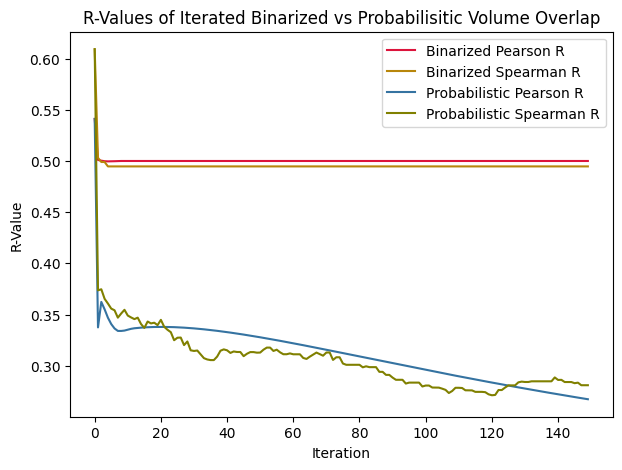

In [36]:
df = pd.read_csv('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Degradation_Volume_Overlap_R_P.csv')

plt.figure(figsize=(7, 5))

sns.lineplot(data=df, x='Iteration',y='Binarized_Pearson_R', label='Binarized Pearson R',color='crimson')
sns.lineplot(data=df, x='Iteration',y='Binarized_Spearman_R', label='Binarized Spearman R',color='darkgoldenrod')
sns.lineplot(data=df,x='Iteration', y='Efield_Pearson_R', label='Probabilistic Pearson R',color='#3573a1')
sns.lineplot(data=df,x='Iteration', y='Efield_Spearman_R', label='Probabilistic Spearman R',color='olive')

plt.xlabel('Iteration')
plt.ylabel('R-Value')
plt.title('R-Values of Iterated Binarized vs Probabilisitic Volume Overlap')
plt.legend()

plt.show()

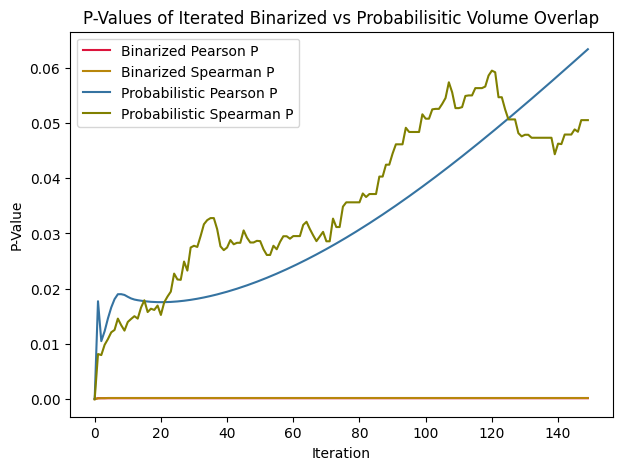

In [38]:
df = pd.read_csv('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Degradation_Volume_Overlap_R_P.csv')

plt.figure(figsize=(7, 5))

sns.lineplot(data=df, x='Iteration',y='Binarized_Pearson_P', label='Binarized Pearson P',color='crimson')
sns.lineplot(data=df, x='Iteration',y='Binarized_Spearman_P', label='Binarized Spearman P',color='darkgoldenrod')
sns.lineplot(data=df,x='Iteration', y='Efield_Pearson_P', label='Probabilistic Pearson P',color='#3573a1')
sns.lineplot(data=df,x='Iteration', y='Efield_Spearman_P', label='Probabilistic Spearman P',color='olive')

plt.xlabel('Iteration')
plt.ylabel('P-Value')
plt.title('P-Values of Iterated Binarized vs Probabilisitic Volume Overlap')
plt.legend()

plt.show()

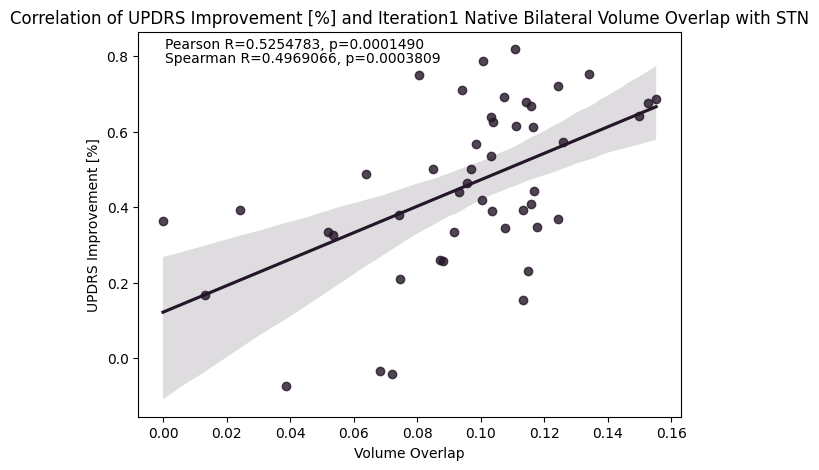

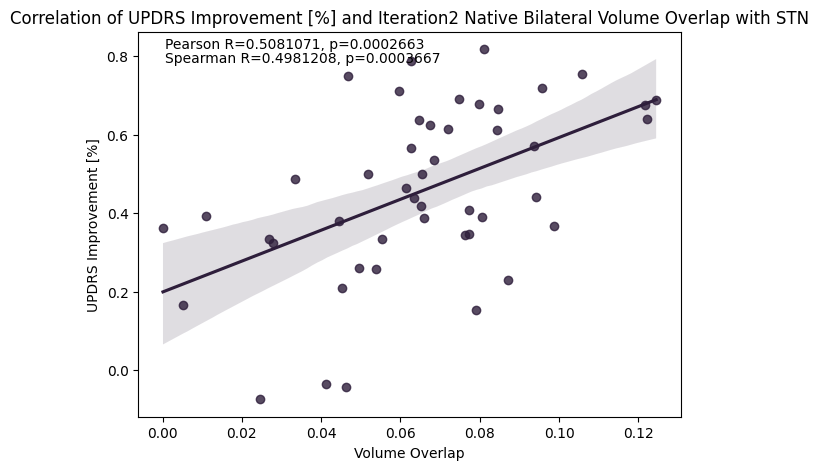

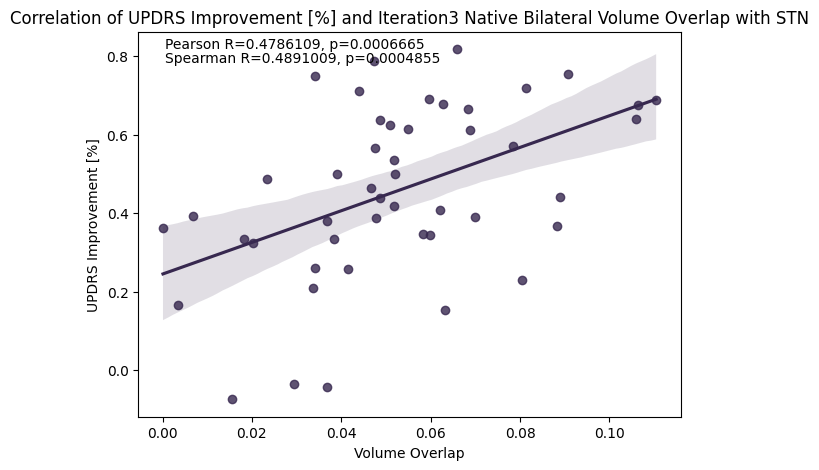

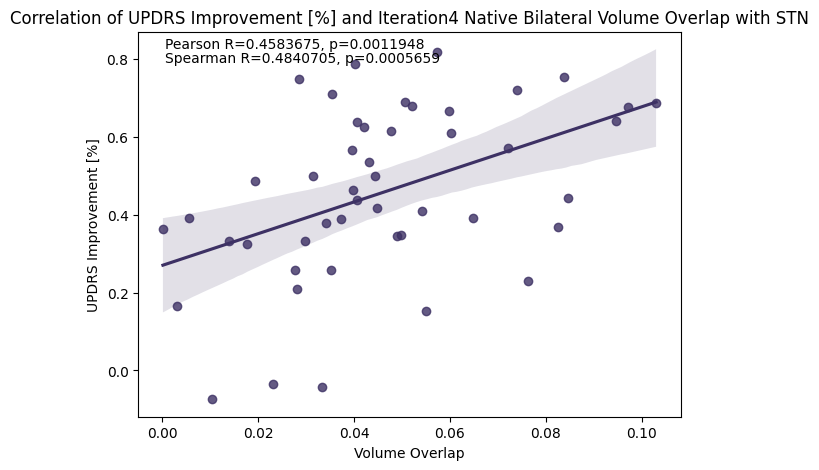

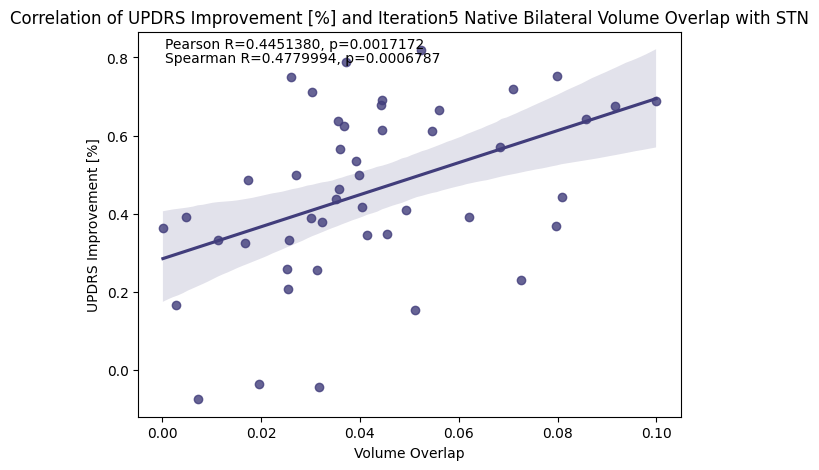

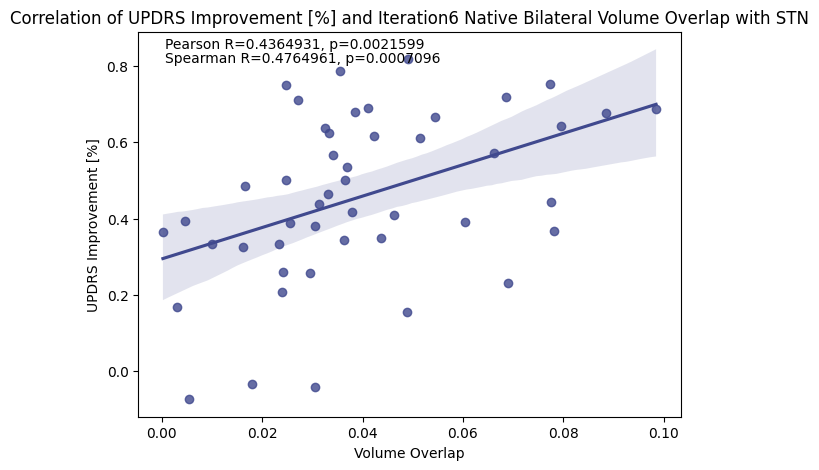

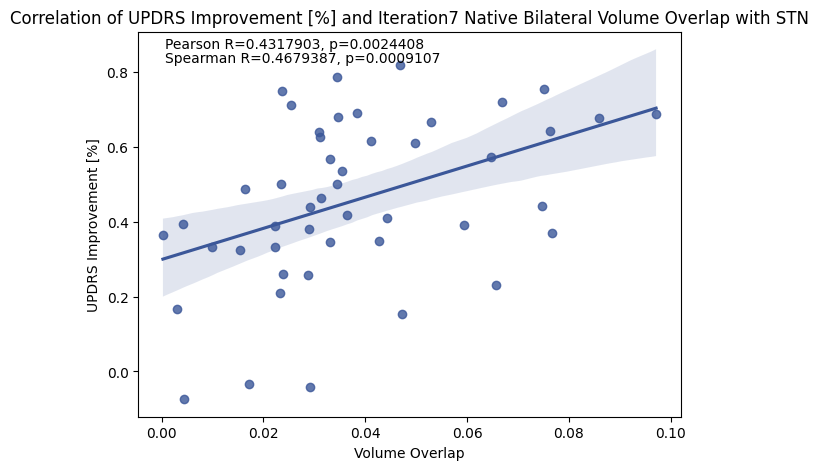

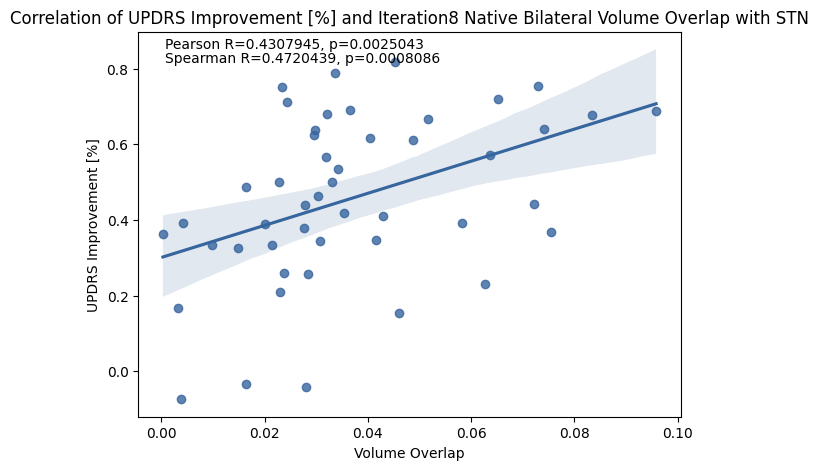

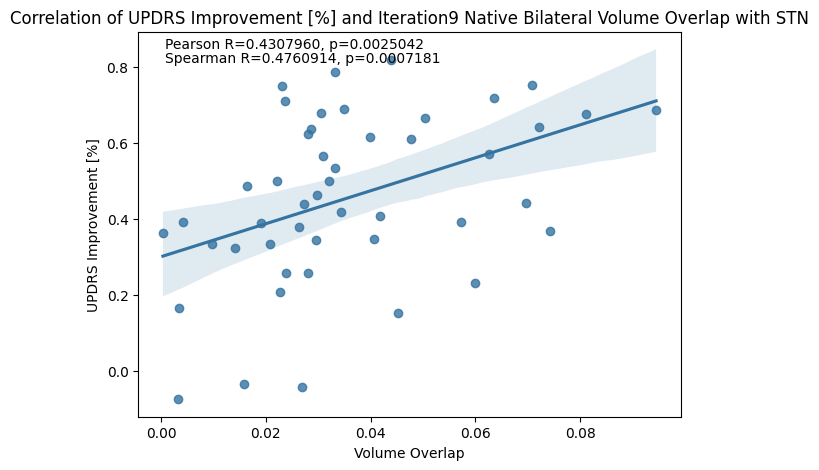

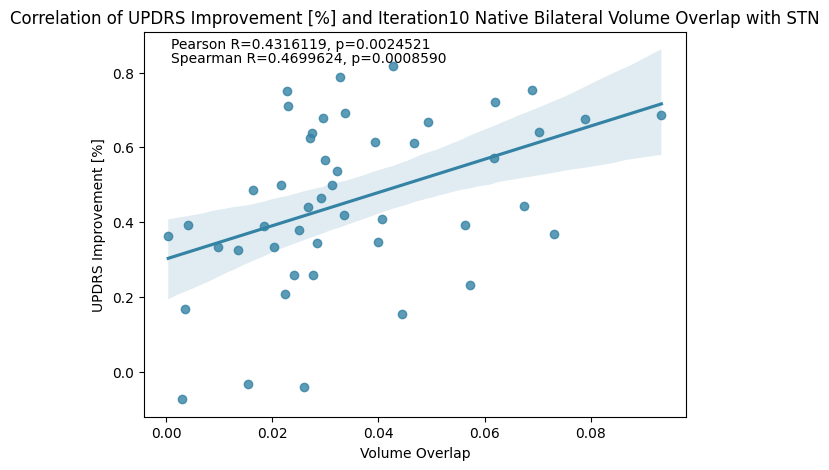

In [26]:
#get r and p values for overlaps- 10 iterations, not binarized
df = pd.read_csv('/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Native_Degradation_Volume_Overlap.csv')
colors = ['#180d16', '#241628', '#2e1e3b', '#37284f', '#3d3164', '#413d7b', '#40498e', '#3b5799', '#37659e', '#3573a1', '#3482a4', '#348fa7', '#359caa', '#38aaac', '#40b7ad', '#4fc5ad', '#68d1ad', '#8bdab2', '#abe2be', '#c6ebd1']

def r_p(vol_overlap_col):
    pearson_r, pearson_p = pearsonr(df['UPDRS_Improvement_Perc'],df[vol_overlap_col])
    spearman_r, spearman_p = spearmanr(df['UPDRS_Improvement_Perc'],df[vol_overlap_col])
    return pearson_r, pearson_p, spearman_r, spearman_p

#plot the graph
def plot_analysis(x_data, title, pearson_r_val, pearson_p_val, spearman_r_val, spearman_p_val, color,path):
    plt.figure(figsize=(7, 5))
    ax = sns.regplot(x=x_data, y=df['UPDRS_Improvement_Perc'], color=color)
    plt.title(title)
    plt.xlabel('Volume Overlap')
    plt.ylabel('UPDRS Improvement [%]')
    ax.text(0.05, 0.95, 'Pearson R={:.7f}, p={:.7f}'.format(pearson_r_val, pearson_p_val),
            transform=ax.transAxes, verticalalignment='bottom')
    ax.text(0.05, 0.95, 'Spearman R={:.7f}, p={:.7f}'.format(spearman_r_val, spearman_p_val),
            transform=ax.transAxes, verticalalignment='top')
    plt.savefig(path)
    plt.show()
    
for j in range(1,11):
    native_stn_pearson_r,native_stn_pearson_p,native_stn_spearman_r,native_stn_spearman_p = r_p(f'Native_Bilateral_mm_iteration_{j}')
    color = colors[j % len(colors)]  # cycle through colors if more iterations than colors
    plot_analysis(df[f'Native_Bilateral_mm_iteration_{j}'],f'Correlation of UPDRS Improvement [%] and Iteration{j} Native Bilateral Volume Overlap with STN',native_stn_pearson_r,native_stn_pearson_p,native_stn_spearman_r,native_stn_spearman_p,color,f'/Volumes/Cingulate/NativeMNI_Overlaps/Berlin51/Figures/Degradation/Iteration{j} Native Bilateral Volume Overlap with STN.png')

In [25]:
#list out individual colors along a seaborn gradient spectrum
from matplotlib import colors as mcolors
mako_colors = sns.color_palette("mako", 20)

#convert the colors to a list of their hex values
mako_colors_hex = [mcolors.to_hex(color) for color in mako_colors]

print(mako_colors_hex)

['#180d16', '#241628', '#2e1e3b', '#37284f', '#3d3164', '#413d7b', '#40498e', '#3b5799', '#37659e', '#3573a1', '#3482a4', '#348fa7', '#359caa', '#38aaac', '#40b7ad', '#4fc5ad', '#68d1ad', '#8bdab2', '#abe2be', '#c6ebd1']
